In [543]:
import pandas as pd
import numpy as np
from datetime import datetime
import time
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics.cluster import silhouette_score
from sklearn.metrics.cluster import silhouette_samples
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import openpyxl
from sklearn.cluster import Birch


# 경고 무시하기
import warnings
warnings.filterwarnings(action='ignore')

# 공통범위 전처리

In [544]:
df=pd.read_csv('C:/Users/sblim/edu-ai/project/ICT/2019_2021_middle1_data.csv')

In [545]:
df.nunique()

TEST_DATE          1087
CPNO                  1
CLNO                 93
USERID              271
STUDY_TYPE            6
TESTSETCODE        8698
QUIZCODE          22339
ORDERNO             102
QUIZ_RESULT           2
CLASSA              426
HARD                  5
SDATE             59502
EDATE             62821
RDATETIME         63203
big_chapter           7
middle_chapter       18
small_chapter        36
dtype: int64

In [546]:
df.shape

(560164, 17)

In [547]:
# 날짜 빠른 순으로 정렬
df = df.sort_values(by='TEST_DATE')

df = df.reset_index(drop=True)
df.head(3)

TEST_DATE  CPNO     CLNO  USERID STUDY_TYPE  \
0   20190101   301  31460.0  130137          R   
1   20190101   301  31206.0  135725          R   
2   20190101   301  31206.0  135725          R   

                        TESTSETCODE                          QUIZCODE  \
0  B3D6566BEBE14667B4694523F48A062D  49482C5E5FD64FE185CD110CC9E64F79   
1  EF74EAACD48C439E8BFDCCA5AA5028A1  105C999873844732A616DA0BA45C20A7   
2  37669BED1A444C4087565B86DD098EC5  BF9A70CF9B3F4A75B36B15E357C4AA20   

   ORDERNO  QUIZ_RESULT                                CLASSA  HARD  \
0        1            1  B1-92-61-03-OL51-S1-06-03-03-03-03-0    12   
1        6            0  B1-92-61-03-OL51-S2-03-09-06-09-15-0    15   
2        4            0  B1-92-61-03-OL51-S2-03-09-03-24-12-0    15   

                     SDATE                    EDATE                RDATETIME  \
0  2019-01-01 11:50:43.000  2019-01-01 11:52:54.977  2019-01-01 11:52:54.203   
1  2019-01-01 20:04:40.000  2019-01-01 20:18:37.160  2019-01-01 20:19:50.353   
2  2019-01-01 20:26:23.000  2019-01-01 20:27:42.307  2019-01-01 20:27:41.610   

              big_chapter             middle_chapter  \
0  B1-92-61-03-OL51-S1-06  B1-92-61-03-OL51-S1-06-03   
1  B1-92-61-03-OL51-S2-03  B1-92-61-03-OL51-S2-03-09   
2  B1-92-61-03-OL51-S2-03  B1-92-61-03-OL51-S2-03-09   

                  small_chapter  
0  B1-92-61-03-OL51-S1-06-03-03  
1  B1-92-61-03-OL51-S2-03-09-06  
2  B1-92-61-03-OL51-S2-03-09-03

In [548]:
df['SDATE'] = pd.to_datetime(df['SDATE'], format='%Y-%m-%d %H:%M:%S.%f')
df['EDATE'] = pd.to_datetime(df['EDATE'], format='%Y-%m-%d %H:%M:%S.%f')
df['TESTTIME'] = (df['EDATE'] - df['SDATE'])

df['TEST_TIME'] = (df['TESTTIME'].dt.total_seconds() / 60).round(2)

In [549]:
df.head(5)

TEST_DATE  CPNO     CLNO  USERID STUDY_TYPE  \
0   20190101   301  31460.0  130137          R   
1   20190101   301  31206.0  135725          R   
2   20190101   301  31206.0  135725          R   
3   20190101   301  31206.0  135725          R   
4   20190101   301  31206.0  135725          R   

                        TESTSETCODE                          QUIZCODE  \
0  B3D6566BEBE14667B4694523F48A062D  49482C5E5FD64FE185CD110CC9E64F79   
1  EF74EAACD48C439E8BFDCCA5AA5028A1  105C999873844732A616DA0BA45C20A7   
2  37669BED1A444C4087565B86DD098EC5  BF9A70CF9B3F4A75B36B15E357C4AA20   
3  37669BED1A444C4087565B86DD098EC5  A9EFB854002F4F33A74866DD75EAA9D2   
4  37669BED1A444C4087565B86DD098EC5  A3D9628830514169B905B4134DB7D4AB   

   ORDERNO  QUIZ_RESULT                                CLASSA  HARD  \
0        1            1  B1-92-61-03-OL51-S1-06-03-03-03-03-0    12   
1        6            0  B1-92-61-03-OL51-S2-03-09-06-09-15-0    15   
2        4            0  B1-92-61-03-OL51-S2-03-09-03-24-12-0    15   
3        1            1  B1-92-61-03-OL51-S2-03-09-03-03-03-0    15   
4        6            1  B1-92-61-03-OL51-S2-03-09-06-09-06-0    15   

                SDATE                   EDATE                RDATETIME  \
0 2019-01-01 11:50:43 2019-01-01 11:52:54.977  2019-01-01 11:52:54.203   
1 2019-01-01 20:04:40 2019-01-01 20:18:37.160  2019-01-01 20:19:50.353   
2 2019-01-01 20:26:23 2019-01-01 20:27:42.307  2019-01-01 20:27:41.610   
3 2019-01-01 20:26:23 2019-01-01 20:27:42.307  2019-01-01 20:27:41.610   
4 2019-01-01 20:26:23 2019-01-01 20:27:42.307  2019-01-01 20:27:41.610   

              big_chapter             middle_chapter  \
0  B1-92-61-03-OL51-S1-06  B1-92-61-03-OL51-S1-06-03   
1  B1-92-61-03-OL51-S2-03  B1-92-61-03-OL51-S2-03-09   
2  B1-92-61-03-OL51-S2-03  B1-92-61-03-OL51-S2-03-09   
3  B1-92-61-03-OL51-S2-03  B1-92-61-03-OL51-S2-03-09   
4  B1-92-61-03-OL51-S2-03  B1-92-61-03-OL51-S2-03-09   

                  small_chapter               TESTTIME  TEST_TIME  
0  B1-92-61-03-OL51-S1-06-03-03 0 days 00:02:11.977000       2.20  
1  B1-92-61-03-OL51-S2-03-09-06 0 days 00:13:57.160000      13.95  
2  B1-92-61-03-OL51-S2-03-09-03 0 days 00:01:19.307000       1.32  
3  B1-92-61-03-OL51-S2-03-09-03 0 days 00:01:19.307000       1.32  
4  B1-92-61-03-OL51-S2-03-09-06 0 days 00:01:19.307000       1.32

In [550]:
df = df.drop(['CPNO', 'CLNO', 'QUIZCODE', 'ORDERNO', 'CLASSA', 'SDATE', 'EDATE', 'TESTTIME', 'RDATETIME'], axis=1)
# 캠퍼스넘버, 클래스넘버, 문제코드, 문항넘버, 단원분류코드, 제출시간 feature 제거

In [551]:
df.head(3)

TEST_DATE  USERID STUDY_TYPE                       TESTSETCODE  \
0   20190101  130137          R  B3D6566BEBE14667B4694523F48A062D   
1   20190101  135725          R  EF74EAACD48C439E8BFDCCA5AA5028A1   
2   20190101  135725          R  37669BED1A444C4087565B86DD098EC5   

   QUIZ_RESULT  HARD             big_chapter             middle_chapter  \
0            1    12  B1-92-61-03-OL51-S1-06  B1-92-61-03-OL51-S1-06-03   
1            0    15  B1-92-61-03-OL51-S2-03  B1-92-61-03-OL51-S2-03-09   
2            0    15  B1-92-61-03-OL51-S2-03  B1-92-61-03-OL51-S2-03-09   

                  small_chapter  TEST_TIME  
0  B1-92-61-03-OL51-S1-06-03-03       2.20  
1  B1-92-61-03-OL51-S2-03-09-06      13.95  
2  B1-92-61-03-OL51-S2-03-09-03       1.32

In [552]:
# TEST_DATE 시험날짜
# USERID 학생
# STUDY_TYPE 시험유형
# TESTSETCODE 시험지코드
# QUIZ_RESULT 퀴즈 정답 유무
# HARD 난이도
# big / middle / small 대 / 중 / 소 단원
# TEST_TIME 시험 응시한 시간

In [553]:
df1=df.copy() 
df2=df.copy()  
df3=df.copy()
df4=df.copy()
df5=df.copy() #
df6=df.copy() # 
df7=df.copy() #
df8=df.copy() #

## 1. TYPE 별로 얼마나 풀어봤는지 6그룹으로 분류

In [715]:
result1 = df1.groupby(['USERID', 'STUDY_TYPE'])['TESTSETCODE'].nunique().reset_index()

In [716]:
result1.head()

USERID STUDY_TYPE  TESTSETCODE
0   90107          A           11
1   90107          P           13
2   90107          R          184
3   90190          A            3
4   90190          R          243

In [717]:
pivot_df1_count = result1.pivot_table(index='USERID', columns='STUDY_TYPE', values='TESTSETCODE', aggfunc='mean')
pivot_df1_count.columns = [f'{col[0]}_count' for col in pivot_df1_count.columns]
pivot_df1_count= pivot_df1_count.round(3)

# 결과 출력
pivot_df1_count.head(5)

A_count  C_count  P_count  R_count  S_count  X_count
USERID                                                      
90107      11.0      NaN     13.0    184.0      NaN      NaN
90190       3.0      NaN      NaN    243.0      NaN      NaN
90388       9.0      NaN     16.0    147.0      NaN      NaN
90390       NaN      NaN      5.0     42.0      NaN      NaN
90848       NaN      NaN      NaN     54.0      NaN      NaN

In [718]:
pivot_df1_count.isnull().sum()

A_count     79
C_count     94
P_count     85
R_count      1
S_count    256
X_count    267
dtype: int64

In [719]:
pivot_df1_count = pivot_df1_count.drop(['S_count', 'X_count'], axis=1)

In [365]:
## 유형 S와 X는 각각 15명, 4명(368건, 131건)으로 데이터의 수가 적어 삭제시킴

In [720]:
pivot_df1_count.head()

A_count  C_count  P_count  R_count
USERID                                    
90107      11.0      NaN     13.0    184.0
90190       3.0      NaN      NaN    243.0
90388       9.0      NaN     16.0    147.0
90390       NaN      NaN      5.0     42.0
90848       NaN      NaN      NaN     54.0

#### feature들 분석

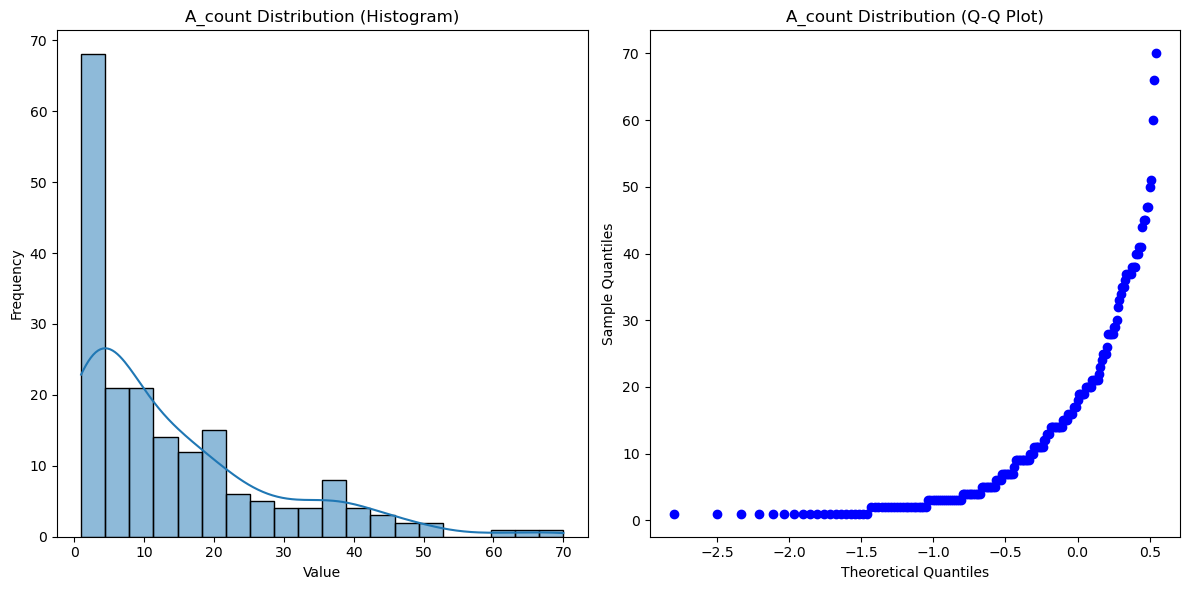

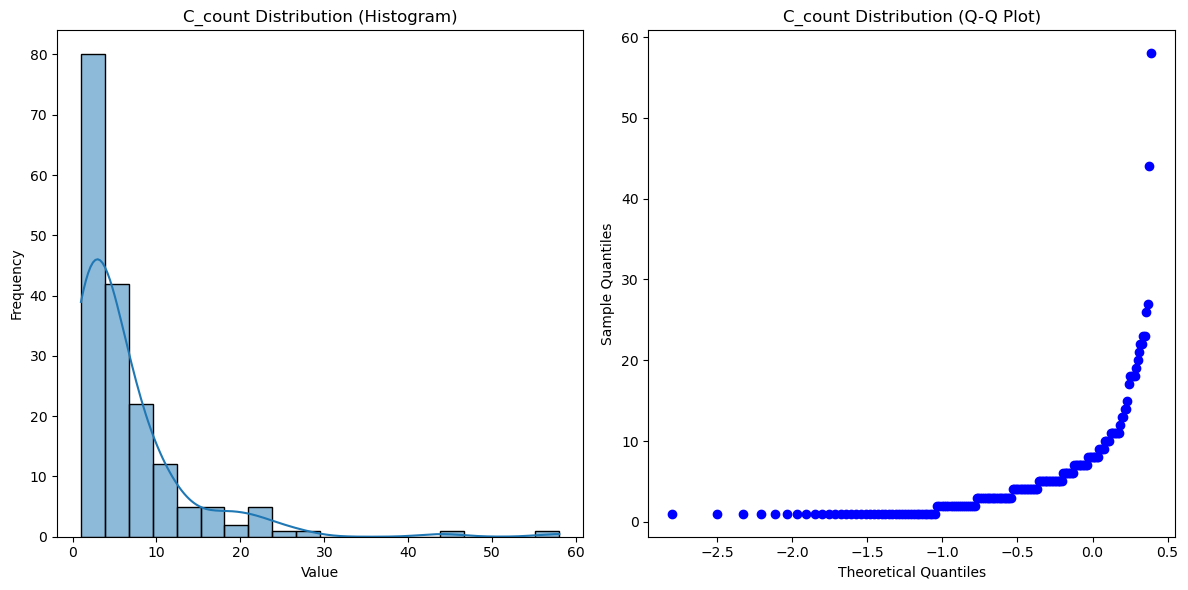

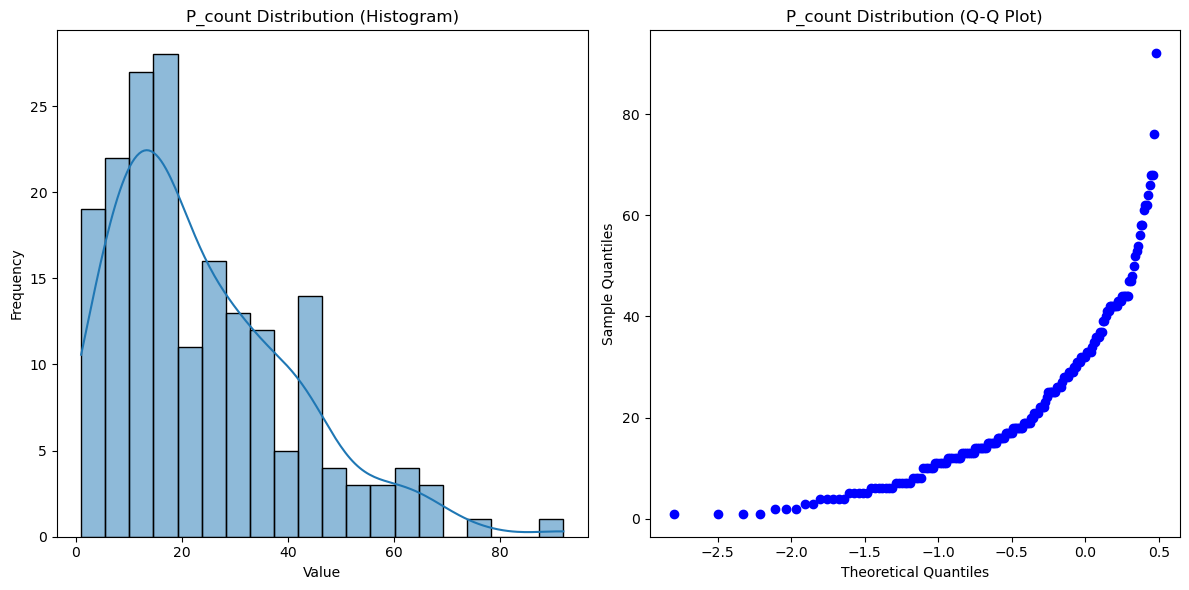

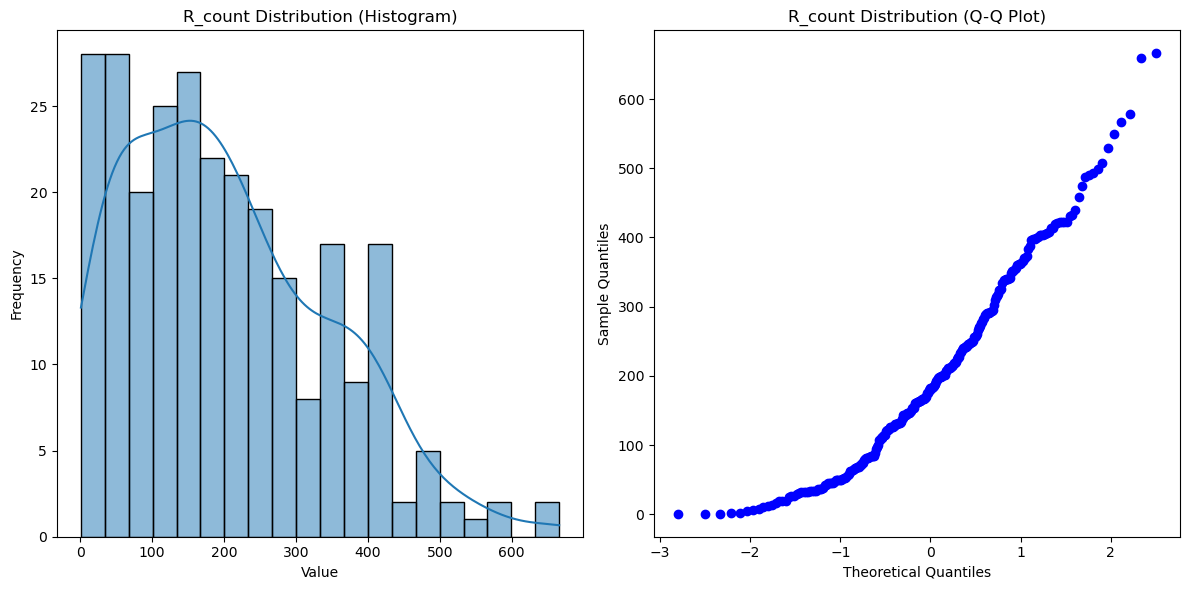

In [721]:
import scipy.stats as stats
for col in pivot_df1_count.columns:
    plt.figure(figsize=(12, 6))
    
    # 히스토그램
    plt.subplot(1, 2, 1)
    sns.histplot(pivot_df1_count[col], kde=True, bins=20)
    plt.title(f'{col} Distribution (Histogram)')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    
    # Q-Q 플롯
    plt.subplot(1, 2, 2)
    stats.probplot(pivot_df1_count[col], plot=plt)
    plt.title(f'{col} Distribution (Q-Q Plot)')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Sample Quantiles')
    
    plt.tight_layout()
    plt.show()

In [722]:
## 각 type별 count 횟수의 분포를 살펴봄

In [723]:
# import numpy as np

# # 각 feature들에 대해 커트라인 찾기
# cut_lines = {}

# for col in pivot_df1_count.columns:
#     values = pivot_df1_count[col].dropna().values
#     percentile_33 = np.percentile(values, 33.3)
#     percentile_67 = np.percentile(values, 66.7)

#     low_group = pivot_df1_count[pivot_df1_count[col] <= percentile_33]
#     medium_group = pivot_df1_count[(pivot_df1_count[col] > percentile_33) & (pivot_df1_count[col] <= percentile_67)]
#     high_group = pivot_df1_count[pivot_df1_count[col] > percentile_67]

#     cut_lines[col] = {
#         'Low_Cutline': low_group[col].max(),
#         'High_Cutline': high_group[col].min()
#     }

# # 결과 출력
# for col, cutline in cut_lines.items():
#     print(f"{col} - Low Cutline: {cutline['Low_Cutline']}, High Cutline: {cutline['High_Cutline']}")

In [724]:
# cut_lines
# ## A : 0  / 0~5.0  /  5.0~24.0  /  24.0~
# ## C : 0  /  0~3.0  /  3.0~10.0  /  10.0~
# ## P : 0  /  0~16.0  /  16.0~40.0  /  24.0~
# ## R : 0  /  0~146.0  /  146.0~340.0  /  340.0~
# ## 풀지 않은 그룹 : 0  /  적은 그룹 : 1  /  중간 그룹 : 2  /  많은 그룹 : 3

In [725]:
# pivot_df1_count.head(10)

In [726]:
# # 클래스 지정 함수 정의
# def classify(value, col):
#     low_cutline = cut_lines[col]['Low_Cutline']
#     high_cutline = cut_lines[col]['bHigh_Cutline']
    
#     if np.isnan(value):
#         return 0
#     elif value <= low_cutline:
#         return 1
#     elif value > high_cutline:
#         return 3
#     else:
#         return 2
#         ## 풀지 않은 그룹 : 0  /  적은 그룹 : 1  /  중간 그룹 : 2  /  많은 그룹 : 3
    
# # 결과 출력
# for col, cutline in cut_lines.items():
#     pivot_df1_count[col + '_class'] = pivot_df1_count[col].apply(classify, args=(col,))

In [727]:
pivot_df1_count = pivot_df1_count.fillna(0)

In [728]:
pivot_df1_count.head(10)

A_count  C_count  P_count  R_count
USERID                                    
90107      11.0      0.0     13.0    184.0
90190       3.0      0.0      0.0    243.0
90388       9.0      0.0     16.0    147.0
90390       0.0      0.0      5.0     42.0
90848       0.0      0.0      0.0     54.0
90941       2.0      0.0      0.0     34.0
91097      22.0      5.0     18.0    126.0
92189      14.0     18.0     53.0    406.0
92216      11.0     14.0     10.0    132.0
92224       1.0      2.0      0.0    169.0

In [729]:
pivot_df1_count_acp = pivot_df1_count.loc[:,['A_count','C_count','P_count']]

In [730]:
from sklearn.preprocessing import Normalizer

mm = MinMaxScaler()
df_scaled = mm.fit_transform(pivot_df1_count_acp)
pivot_df1_countacp_scaled = pd.DataFrame(df_scaled).round(3)

pivot_df1_countacp_scaled.columns = pivot_df1_count_acp.columns
pivot_df1_countacp_scaled = pivot_df1_countacp_scaled.set_index(userid)

In [731]:
# pivot_df1_count = pivot_df1_count.drop(['A_count','C_count','P_count','R_count'],axis=1)

In [732]:
pivot_df1_countacp_scaled.head(10)

A_count  C_count  P_count
USERID                           
90107     0.157    0.000    0.141
90190     0.043    0.000    0.000
90388     0.129    0.000    0.174
90390     0.000    0.000    0.054
90848     0.000    0.000    0.000
90941     0.029    0.000    0.000
91097     0.314    0.086    0.196
92189     0.200    0.310    0.576
92216     0.157    0.241    0.109
92224     0.014    0.034    0.000

In [733]:
# for col in pivot_df1_count.columns:
#     value_counts = pivot_df1_count[col].value_counts()
#     print(f"{col} 열에 있는 값들의 개수:")
#     print(value_counts)
#     print()

In [734]:
pivot_df1_count_r = pivot_df1_count.loc[:,['R_count']]

In [735]:
mm = MinMaxScaler()
df_scaled = mm.fit_transform(pivot_df1_count_r)
pivot_df1_countr_scaled = pd.DataFrame(df_scaled).round(3)

pivot_df1_countr_scaled.columns = pivot_df1_count_r.columns
pivot_df1_countr_scaled = pivot_df1_countr_scaled.set_index(userid)

In [736]:
pivot_df1_countr_scaled.head()

R_count
USERID         
90107     0.276
90190     0.365
90388     0.221
90390     0.063
90848     0.081

In [737]:
merged_df1 = pd.merge(pivot_df1_countacp_scaled, pivot_df1_countr_scaled, on='USERID', how='inner')
merged_df1 ## total feature : 4

A_count  C_count  P_count  R_count
USERID                                    
90107     0.157    0.000    0.141    0.276
90190     0.043    0.000    0.000    0.365
90388     0.129    0.000    0.174    0.221
90390     0.000    0.000    0.054    0.063
90848     0.000    0.000    0.000    0.081
...         ...      ...      ...      ...
334341    0.057    0.000    0.109    0.246
337341    0.057    0.017    0.120    0.069
337552    0.000    0.000    0.000    0.020
338130    0.043    0.000    0.076    0.069
338131    0.000    0.000    0.000    0.047

[271 rows x 4 columns]

In [738]:
userid = merged_df1.index

## 2. HARD 별로 정답률 4가지 클래스 나누기

In [739]:
result2 = df2.groupby(['USERID','HARD']).agg(ANSWER_RATIO = ('QUIZ_RESULT', lambda x : (x == 1).mean())).reset_index()

In [740]:
pivot_df2_ratio = result2.pivot_table(index='USERID', columns='HARD', values='ANSWER_RATIO', aggfunc='mean')

pivot_df2_ratio.columns = [f'HARD{col}_ratio' for col in pivot_df2_ratio.columns]

# 소수점 3자리까지 반올림
pivot_df2_ratio = pivot_df2_ratio.round(3)

# 결과 출력
pivot_df2_ratio.head(5)

HARD3_ratio  HARD6_ratio  HARD9_ratio  HARD12_ratio  HARD15_ratio
USERID                                                                   
90107         0.763        0.783        0.834         0.877         0.942
90190         0.866        0.912        0.935         0.946         0.919
90388         1.000        0.841        0.885         0.886         0.932
90390         1.000        0.723        0.798         0.807         1.000
90848         1.000        0.722        0.747         0.849         0.841

In [741]:
pivot_df2_ratio.isnull().sum()

HARD3_ratio     10
HARD6_ratio      7
HARD9_ratio      2
HARD12_ratio     4
HARD15_ratio     1
dtype: int64

In [646]:
# ## 결측치가 많지 않아 최빈값으로 대체
# # 각 feature의 최빈값 계산
# mode_values = pivot_df2_ratio.mode().iloc[0]

# # 결측치를 최빈값으로 대체
# pivot_df2_ratio = pivot_df2_ratio.fillna(mode_values)

In [647]:
# pivot_df2_ratio.shape

#### feature들 분석

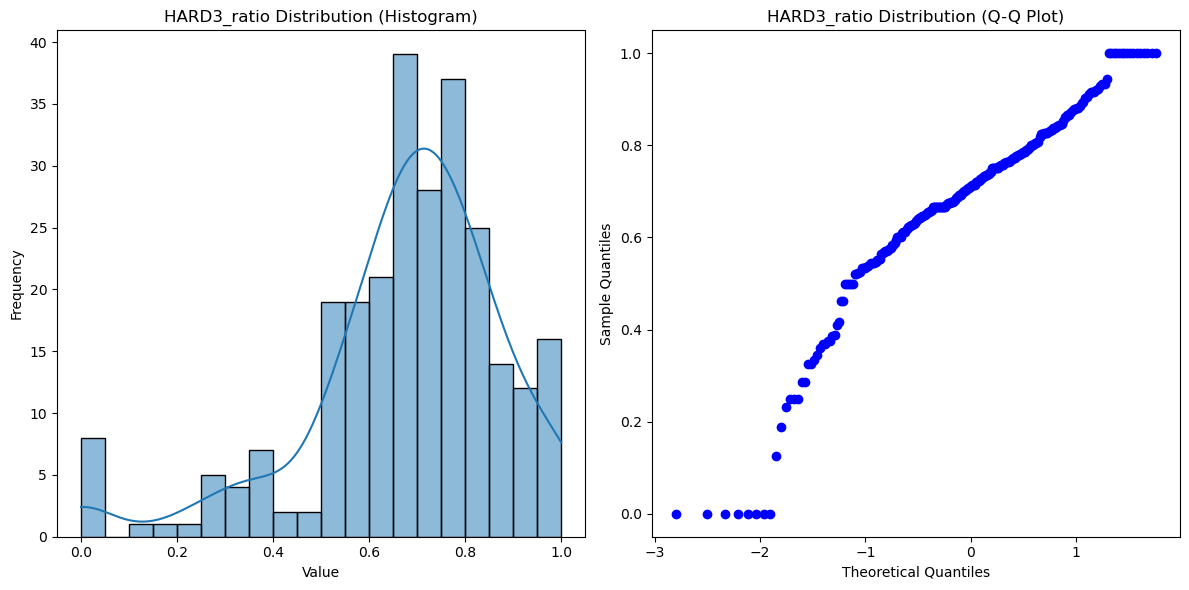

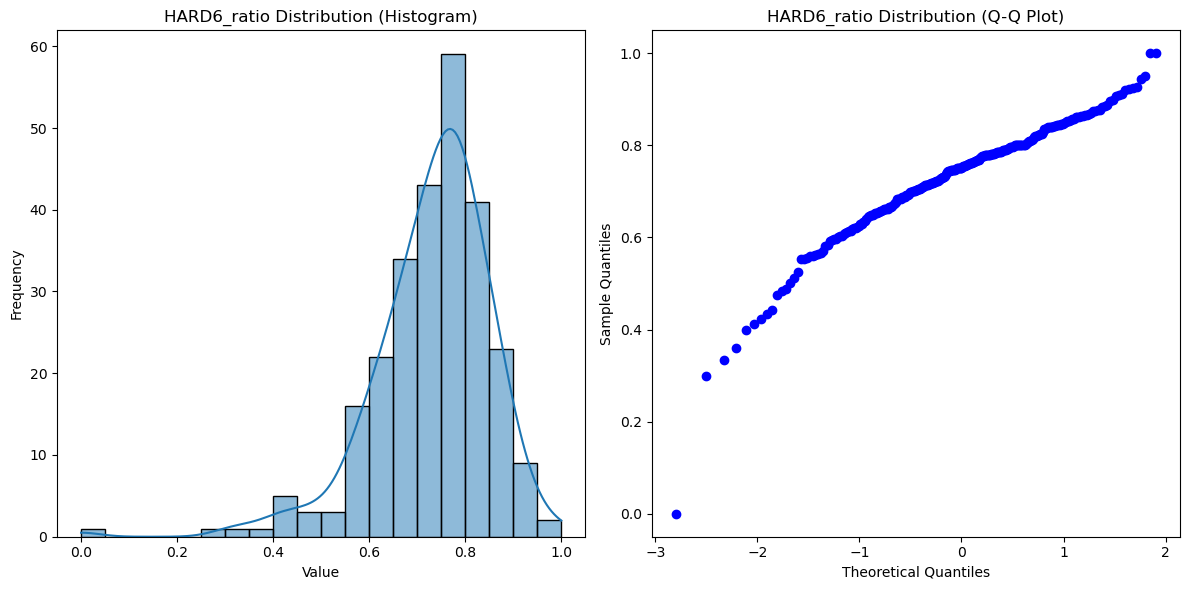

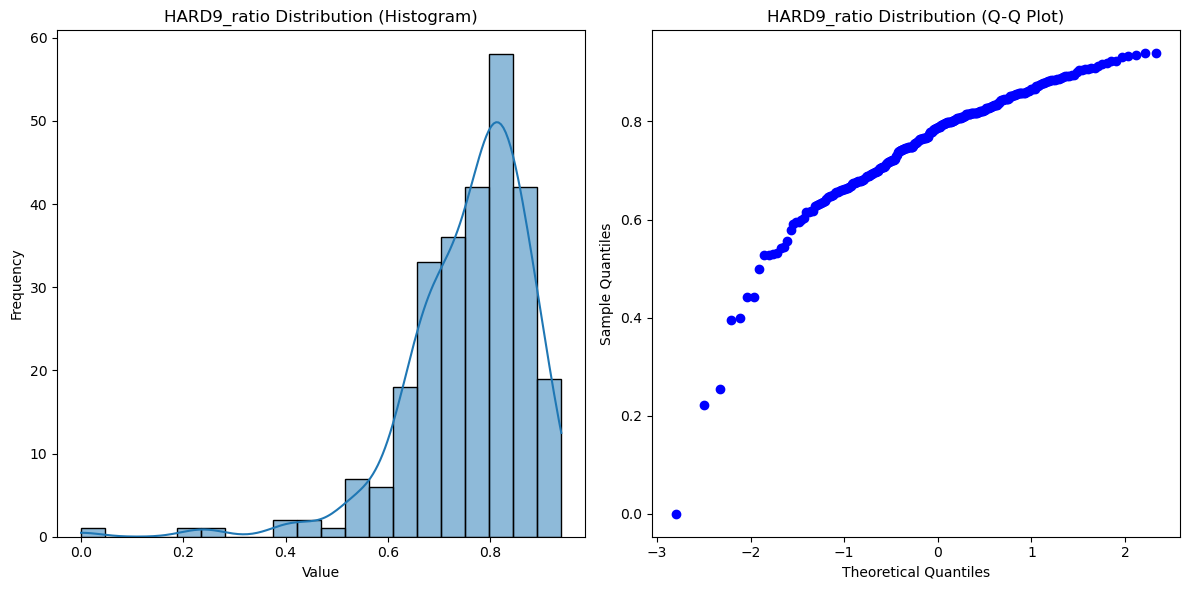

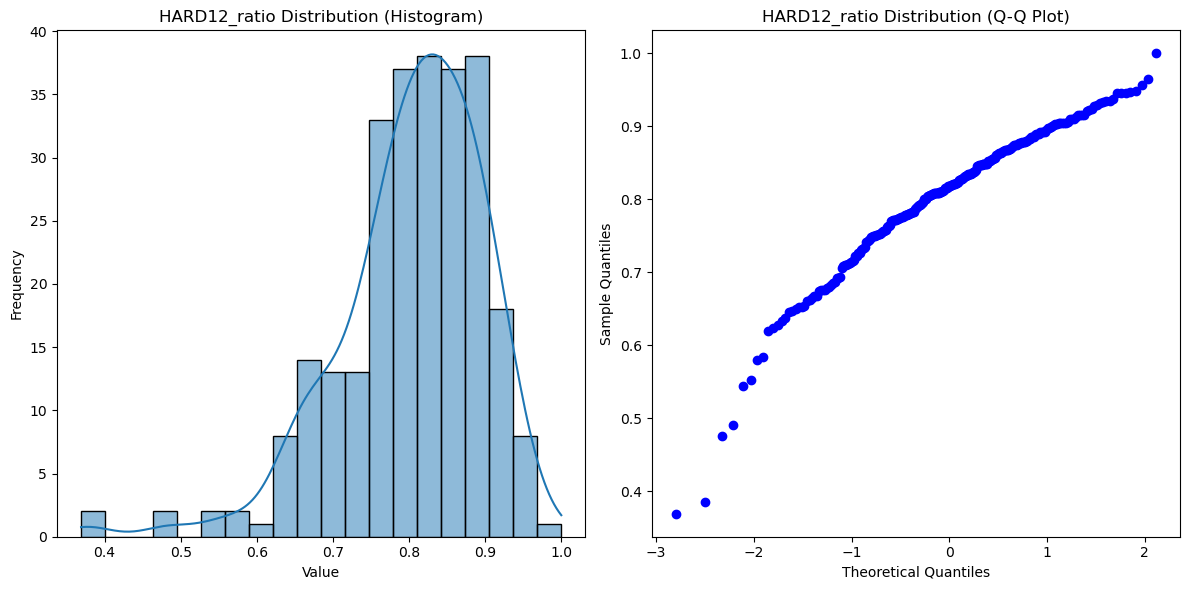

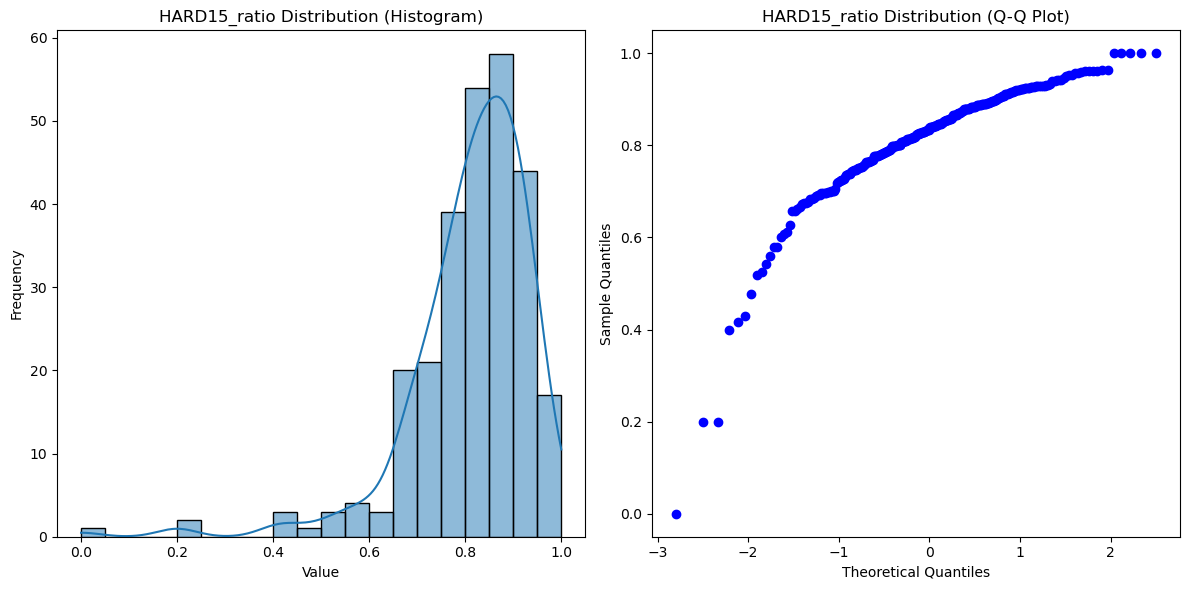

In [742]:
import scipy.stats as stats
for col in pivot_df2_ratio.columns:
    plt.figure(figsize=(12, 6))
    
    # 히스토그램
    plt.subplot(1, 2, 1)
    sns.histplot(pivot_df2_ratio[col], kde=True, bins=20)
    plt.title(f'{col} Distribution (Histogram)')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    
    # Q-Q 플롯
    plt.subplot(1, 2, 2)
    stats.probplot(pivot_df2_ratio[col], plot=plt)
    plt.title(f'{col} Distribution (Q-Q Plot)')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Sample Quantiles')
    
    plt.tight_layout()
    plt.show()

In [743]:
import numpy as np

# 각 feature들에 대해 커트라인 찾기
cut_lines = {}

for col in pivot_df2_ratio.columns:
    values = pivot_df2_ratio[col].dropna().values
    percentile_40 = np.percentile(values, 40.0)
    percentile_70 = np.percentile(values, 70.0)
    percentile_80 = np.percentile(values, 80.0)
    percentile_90 = np.percentile(values, 90.0)

    Lv_1_group = pivot_df2_ratio[pivot_df2_ratio[col] <= percentile_40]
    Lv_2_group = pivot_df2_ratio[(pivot_df2_ratio[col] > percentile_40) & (pivot_df2_ratio[col] <= percentile_70)]
    Lv_3_group = pivot_df2_ratio[(pivot_df2_ratio[col] > percentile_70) & (pivot_df2_ratio[col] <= percentile_80)]
    Lv_4_group = pivot_df2_ratio[(pivot_df2_ratio[col] > percentile_80) & (pivot_df2_ratio[col] <= percentile_90)]
    Lv_5_group = pivot_df2_ratio[pivot_df2_ratio[col] > percentile_90]

    cut_lines[col] = {
        'Lv1_Cutline': Lv_1_group[col].max(),
        'Lv2_Cutline': Lv_2_group[col].max(),
        'Lv3_Cutline': Lv_3_group[col].max(),
        'Lv4_Cutline': Lv_4_group[col].max(),
        'Lv5_Cutline': Lv_5_group[col].min()
    }

# 결과 출력
# for col, cutline in cut_lines.items():
#     print(f"{col} - Low Cutline: {cutline['Low_Cutline']}, High Cutline: {cutline['High_Cutline']}")

In [744]:
cut_lines

{'HARD3_ratio': {'Lv1_Cutline': 0.667,
  'Lv2_Cutline': 0.78,
  'Lv3_Cutline': 0.829,
  'Lv4_Cutline': 0.905,
  'Lv5_Cutline': 0.911},
 'HARD6_ratio': {'Lv1_Cutline': 0.719,
  'Lv2_Cutline': 0.795,
  'Lv3_Cutline': 0.823,
  'Lv4_Cutline': 0.861,
  'Lv5_Cutline': 0.862},
 'HARD9_ratio': {'Lv1_Cutline': 0.751,
  'Lv2_Cutline': 0.824,
  'Lv3_Cutline': 0.854,
  'Lv4_Cutline': 0.885,
  'Lv5_Cutline': 0.887},
 'HARD12_ratio': {'Lv1_Cutline': 0.796,
  'Lv2_Cutline': 0.861,
  'Lv3_Cutline': 0.88,
  'Lv4_Cutline': 0.905,
  'Lv5_Cutline': 0.906},
 'HARD15_ratio': {'Lv1_Cutline': 0.81,
  'Lv2_Cutline': 0.885,
  'Lv3_Cutline': 0.907,
  'Lv4_Cutline': 0.93,
  'Lv5_Cutline': 0.931}}

In [745]:
# 클래스 지정 함수 정의
def classify(value, col):
    Lv1_Cutline = cut_lines[col]['Lv1_Cutline']
    Lv2_Cutline = cut_lines[col]['Lv2_Cutline']
    Lv3_Cutline = cut_lines[col]['Lv3_Cutline']
    Lv4_Cutline = cut_lines[col]['Lv4_Cutline']
    Lv5_Cutline = cut_lines[col]['Lv5_Cutline']
    
    if np.isnan(value):
        return 0 # value = 0
    elif value <= Lv1_Cutline:
        return 1
    elif value <= Lv2_Cutline:
        return 2
    elif value <= Lv3_Cutline:
        return 3
    elif value <= Lv4_Cutline: 
        return 4
    else:
        return 5
    
# 결과 출력
for col, cutline in cut_lines.items():
    pivot_df2_ratio[col + '_class'] = pivot_df2_ratio[col].apply(classify, args=(col,))

In [746]:
pivot_df2_ratio.head()

HARD3_ratio  HARD6_ratio  HARD9_ratio  HARD12_ratio  HARD15_ratio  \
USERID                                                                      
90107         0.763        0.783        0.834         0.877         0.942   
90190         0.866        0.912        0.935         0.946         0.919   
90388         1.000        0.841        0.885         0.886         0.932   
90390         1.000        0.723        0.798         0.807         1.000   
90848         1.000        0.722        0.747         0.849         0.841   

        HARD3_ratio_class  HARD6_ratio_class  HARD9_ratio_class  \
USERID                                                            
90107                   2                  2                  3   
90190                   4                  5                  5   
90388                   5                  4                  4   
90390                   5                  2                  2   
90848                   5                  2                  1   

        HARD12_ratio_class  HARD15_ratio_class  
USERID                                          
90107                    3                   5  
90190                    5                   4  
90388                    4                   5  
90390                    2                   5  
90848                    2                   2

In [747]:
pivot_df2_ratio = pivot_df2_ratio.drop(['HARD3_ratio','HARD6_ratio','HARD9_ratio','HARD12_ratio','HARD15_ratio'],axis=1)

In [748]:
pivot_df2_ratio.head()

HARD3_ratio_class  HARD6_ratio_class  HARD9_ratio_class  \
USERID                                                            
90107                   2                  2                  3   
90190                   4                  5                  5   
90388                   5                  4                  4   
90390                   5                  2                  2   
90848                   5                  2                  1   

        HARD12_ratio_class  HARD15_ratio_class  
USERID                                          
90107                    3                   5  
90190                    5                   4  
90388                    4                   5  
90390                    2                   5  
90848                    2                   2

In [749]:
for col in pivot_df2_ratio.columns:
    value_counts = pivot_df2_ratio[col].value_counts()
    print(f"{col} 열에 있는 값들의 개수:")
    print(value_counts)
    print()

HARD3_ratio_class 열에 있는 값들의 개수:
1    110
2     74
4     26
5     26
3     25
0     10
Name: HARD3_ratio_class, dtype: int64

HARD6_ratio_class 열에 있는 값들의 개수:
1    106
2     79
5     27
4     26
3     26
0      7
Name: HARD6_ratio_class, dtype: int64

HARD9_ratio_class 열에 있는 값들의 개수:
1    108
2     80
4     28
3     27
5     26
0      2
Name: HARD9_ratio_class, dtype: int64

HARD12_ratio_class 열에 있는 값들의 개수:
1    107
2     80
3     27
5     27
4     26
0      4
Name: HARD12_ratio_class, dtype: int64

HARD15_ratio_class 열에 있는 값들의 개수:
1    108
2     81
4     28
3     27
5     26
0      1
Name: HARD15_ratio_class, dtype: int64



In [750]:
mm = MinMaxScaler()
df1_scaled = mm.fit_transform(pivot_df2_ratio)
pivot_df12_scaled = pd.DataFrame(df1_scaled).round(3)
pivot_df12_scaled.columns = pivot_df2_ratio.columns
pivot_df12_scaled = pivot_df12_scaled.set_index(userid)

In [751]:
merged_df2 = pd.merge(merged_df1, pivot_df12_scaled, on='USERID', how='inner')
merged_df2  ## total feature : 9

A_count  C_count  P_count  R_count  HARD3_ratio_class  \
USERID                                                          
90107     0.157    0.000    0.141    0.276                0.4   
90190     0.043    0.000    0.000    0.365                0.8   
90388     0.129    0.000    0.174    0.221                1.0   
90390     0.000    0.000    0.054    0.063                1.0   
90848     0.000    0.000    0.000    0.081                1.0   
...         ...      ...      ...      ...                ...   
334341    0.057    0.000    0.109    0.246                0.2   
337341    0.057    0.017    0.120    0.069                0.0   
337552    0.000    0.000    0.000    0.020                1.0   
338130    0.043    0.000    0.076    0.069                0.0   
338131    0.000    0.000    0.000    0.047                0.0   

        HARD6_ratio_class  HARD9_ratio_class  HARD12_ratio_class  \
USERID                                                             
90107                 0.4                0.6                 0.6   
90190                 1.0                1.0                 1.0   
90388                 0.8                0.8                 0.8   
90390                 0.4                0.4                 0.4   
90848                 0.4                0.2                 0.4   
...                   ...                ...                 ...   
334341                0.4                0.2                 0.4   
337341                0.2                0.2                 0.2   
337552                1.0                0.8                 0.2   
338130                0.2                0.2                 0.2   
338131                0.0                0.4                 0.6   

        HARD15_ratio_class  
USERID                      
90107                  1.0  
90190                  0.8  
90388                  1.0  
90390                  1.0  
90848                  0.4  
...                    ...  
334341                 0.2  
337341                 0.2  
337552                 0.0  
338130                 0.2  
338131                 0.8  

[271 rows x 9 columns]

In [752]:
userid = merged_df2.index

## 3. 전체 정답률

In [760]:
result3 = df3.groupby(['USERID']).agg(total_ratio = ('QUIZ_RESULT', lambda x: (x == 1).mean())).reset_index()

In [761]:
result3.head()

USERID  total_ratio
0   90107     0.854886
1   90190     0.928629
2   90388     0.888889
3   90390     0.785530
4   90848     0.814141

In [762]:
result3.set_index('USERID', inplace=True)

In [766]:
pivot_df3_ratio = result3.round(3)

In [767]:
pivot_df3_ratio.head()

total_ratio
USERID             
90107         0.855
90190         0.929
90388         0.889
90390         0.786
90848         0.814

In [768]:
merged_df3 = pd.merge(merged_df2, pivot_df3_ratio, on='USERID', how='inner')
merged_df3  ## total feature : 10

A_count  C_count  P_count  R_count  HARD3_ratio_class  \
USERID                                                          
90107     0.157    0.000    0.141    0.276                0.4   
90190     0.043    0.000    0.000    0.365                0.8   
90388     0.129    0.000    0.174    0.221                1.0   
90390     0.000    0.000    0.054    0.063                1.0   
90848     0.000    0.000    0.000    0.081                1.0   
...         ...      ...      ...      ...                ...   
334341    0.057    0.000    0.109    0.246                0.2   
337341    0.057    0.017    0.120    0.069                0.0   
337552    0.000    0.000    0.000    0.020                1.0   
338130    0.043    0.000    0.076    0.069                0.0   
338131    0.000    0.000    0.000    0.047                0.0   

        HARD6_ratio_class  HARD9_ratio_class  HARD12_ratio_class  \
USERID                                                             
90107                 0.4                0.6                 0.6   
90190                 1.0                1.0                 1.0   
90388                 0.8                0.8                 0.8   
90390                 0.4                0.4                 0.4   
90848                 0.4                0.2                 0.4   
...                   ...                ...                 ...   
334341                0.4                0.2                 0.4   
337341                0.2                0.2                 0.2   
337552                1.0                0.8                 0.2   
338130                0.2                0.2                 0.2   
338131                0.0                0.4                 0.6   

        HARD15_ratio_class  total_ratio  
USERID                                   
90107                  1.0        0.855  
90190                  0.8        0.929  
90388                  1.0        0.889  
90390                  1.0        0.786  
90848                  0.4        0.814  
...                    ...          ...  
334341                 0.2        0.781  
337341                 0.2        0.696  
337552                 0.0        0.857  
338130                 0.2        0.650  
338131                 0.8        0.866  

[271 rows x 10 columns]

In [769]:
userid = merged_df3.index

## 4. 유형별로 정답률

In [770]:
result4 = df4.groupby(['USERID','STUDY_TYPE']).agg(ANSWER_RATIO = ('QUIZ_RESULT', lambda x : (x == 1).mean())).reset_index()
                                                    # 각각의 난이도 문제를 맞은 개수(x==1)는 전체 문제수에서 몇개인지 => 정답률

In [771]:
result4.head()

USERID STUDY_TYPE  ANSWER_RATIO
0   90107          A      0.837288
1   90107          P      0.863636
2   90107          R      0.857736
3   90190          A      0.880000
4   90190          R      0.930146

In [772]:
pivot_df4_ratio = result4.pivot_table(index='USERID', columns='STUDY_TYPE', values='ANSWER_RATIO', aggfunc='mean')
pivot_df4_ratio.columns = [f'{col[0]}_ratio' for col in pivot_df4_ratio.columns]
pivot_df4_ratio = pivot_df4_ratio.round(3)

# 결과 출력
pivot_df4_ratio.head(5)

A_ratio  C_ratio  P_ratio  R_ratio  S_ratio  X_ratio
USERID                                                      
90107     0.837      NaN    0.864    0.858      NaN      NaN
90190     0.880      NaN      NaN    0.930      NaN      NaN
90388     0.833      NaN    0.769    0.898      NaN      NaN
90390       NaN      NaN    0.562    0.795      NaN      NaN
90848       NaN      NaN      NaN    0.814      NaN      NaN

In [773]:
pivot_df4_ratio.isnull().sum()

A_ratio     79
C_ratio     94
P_ratio     85
R_ratio      1
S_ratio    256
X_ratio    267
dtype: int64

In [774]:
pivot_df4_ratio = pivot_df4_ratio.drop(['S_ratio', 'X_ratio'], axis=1)

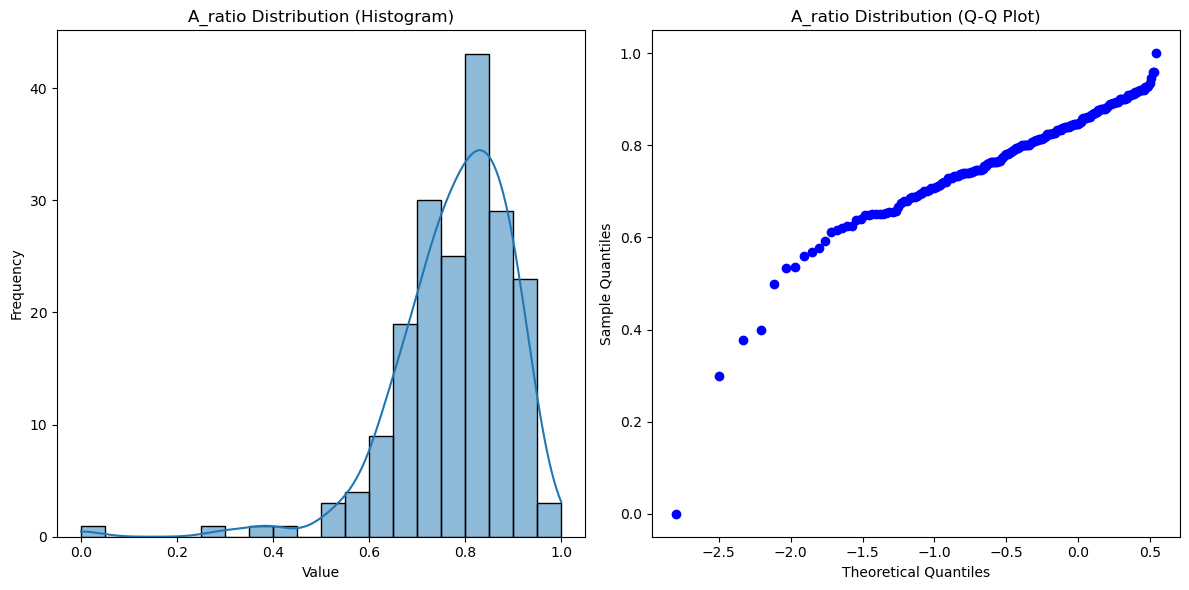

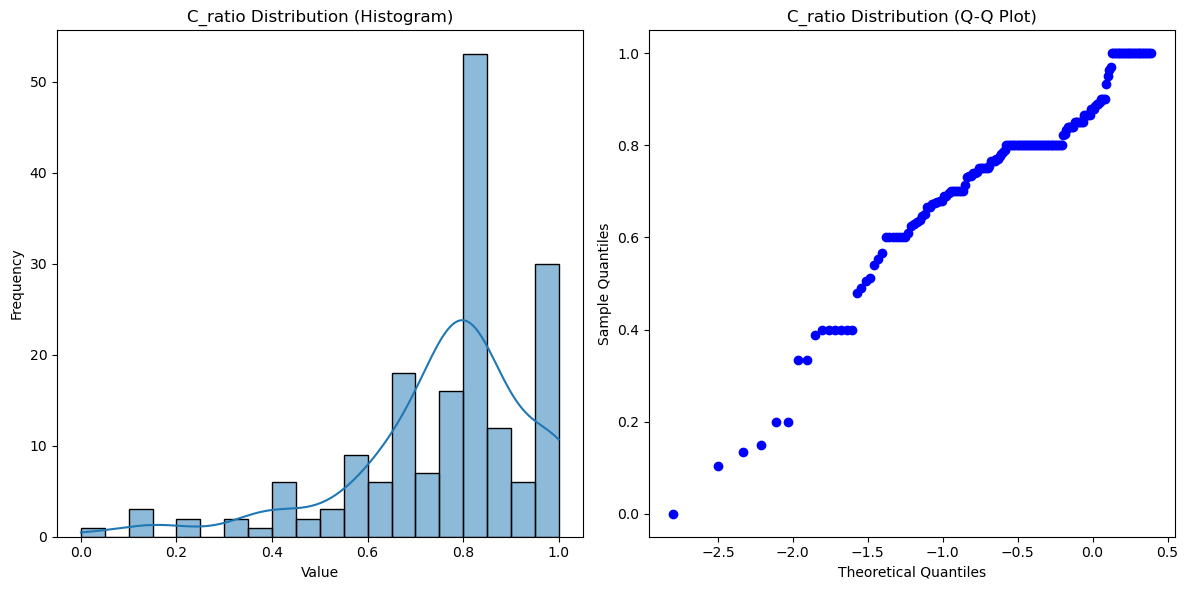

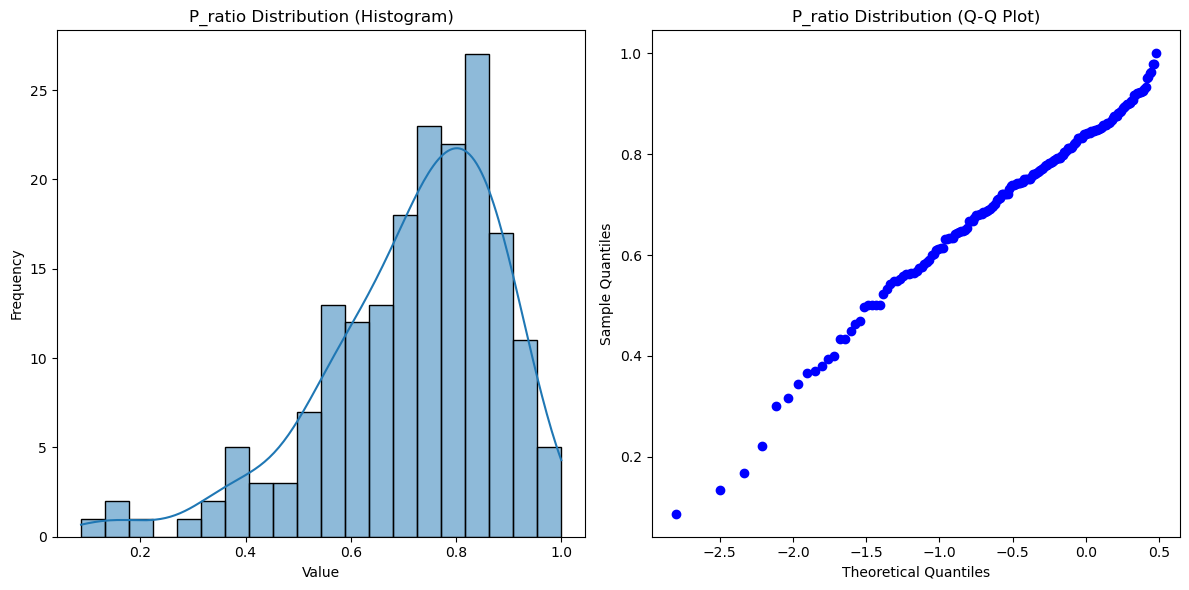

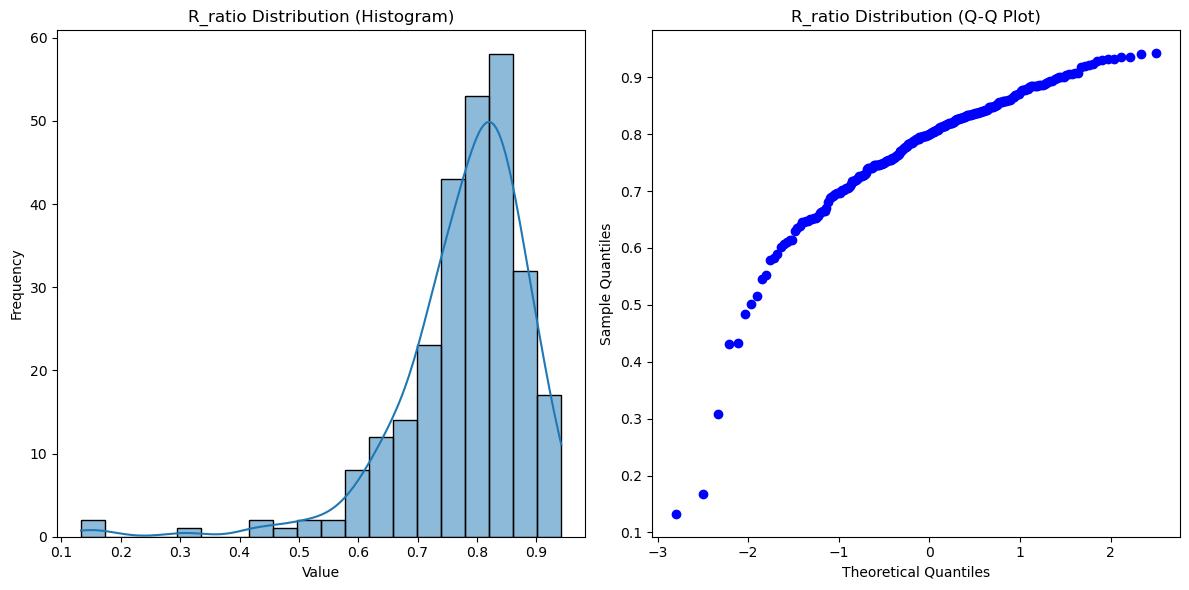

In [775]:
for col in pivot_df4_ratio.columns:
    plt.figure(figsize=(12, 6))
    
    # 히스토그램
    plt.subplot(1, 2, 1)
    sns.histplot(pivot_df4_ratio[col], kde=True, bins=20)
    plt.title(f'{col} Distribution (Histogram)')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    
    # Q-Q 플롯
    plt.subplot(1, 2, 2)
    stats.probplot(pivot_df4_ratio[col], plot=plt)
    plt.title(f'{col} Distribution (Q-Q Plot)')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Sample Quantiles')
    
    plt.tight_layout()
    plt.show()

In [776]:
# 각 feature들에 대해 커트라인 찾기
cut_lines = {}

for col in pivot_df4_ratio.columns:
    values = pivot_df4_ratio[col].dropna().values
    percentile_40 = np.percentile(values, 40.0)
    percentile_70 = np.percentile(values, 70.0)
    percentile_80 = np.percentile(values, 80.0)
    percentile_90 = np.percentile(values, 90.0)

    Lv_1_group = pivot_df4_ratio[pivot_df4_ratio[col] <= percentile_40]
    Lv_2_group = pivot_df4_ratio[(pivot_df4_ratio[col] > percentile_40) & (pivot_df4_ratio[col] <= percentile_70)]
    Lv_3_group = pivot_df4_ratio[(pivot_df4_ratio[col] > percentile_70) & (pivot_df4_ratio[col] <= percentile_80)]
    Lv_4_group = pivot_df4_ratio[(pivot_df4_ratio[col] > percentile_80) & (pivot_df4_ratio[col] <= percentile_90)]
    Lv_5_group = pivot_df4_ratio[pivot_df4_ratio[col] > percentile_90]

    cut_lines[col] = {
        'Lv1_Cutline': Lv_1_group[col].max(),
        'Lv2_Cutline': Lv_2_group[col].max(),
        'Lv3_Cutline': Lv_3_group[col].max(),
        'Lv4_Cutline': Lv_4_group[col].max(),
        'Lv5_Cutline': Lv_5_group[col].min()
    }

In [777]:
cut_lines

{'A_ratio': {'Lv1_Cutline': 0.764,
  'Lv2_Cutline': 0.846,
  'Lv3_Cutline': 0.88,
  'Lv4_Cutline': 0.902,
  'Lv5_Cutline': 0.909},
 'C_ratio': {'Lv1_Cutline': 0.771,
  'Lv2_Cutline': 0.85,
  'Lv3_Cutline': 0.895,
  'Lv4_Cutline': 1.0,
  'Lv5_Cutline': nan},
 'P_ratio': {'Lv1_Cutline': 0.711,
  'Lv2_Cutline': 0.833,
  'Lv3_Cutline': 0.857,
  'Lv4_Cutline': 0.9,
  'Lv5_Cutline': 0.902},
 'R_ratio': {'Lv1_Cutline': 0.778,
  'Lv2_Cutline': 0.837,
  'Lv3_Cutline': 0.858,
  'Lv4_Cutline': 0.887,
  'Lv5_Cutline': 0.889}}

In [778]:
for col, cutline in cut_lines.items():
    pivot_df4_ratio[col + '_class'] = pivot_df4_ratio[col].apply(classify, args=(col,))

In [779]:
pivot_df4_ratio.head()

A_ratio  C_ratio  P_ratio  R_ratio  A_ratio_class  C_ratio_class  \
USERID                                                                     
90107     0.837      NaN    0.864    0.858              2              0   
90190     0.880      NaN      NaN    0.930              3              0   
90388     0.833      NaN    0.769    0.898              2              0   
90390       NaN      NaN    0.562    0.795              0              0   
90848       NaN      NaN      NaN    0.814              0              0   

        P_ratio_class  R_ratio_class  
USERID                                
90107               4              3  
90190               0              5  
90388               2              5  
90390               1              2  
90848               0              2

In [780]:
pivot_df4_ratio = pivot_df4_ratio.drop(['A_ratio', 'C_ratio', 'P_ratio', 'R_ratio'],axis=1)

In [781]:
pivot_df4_ratio

A_ratio_class  C_ratio_class  P_ratio_class  R_ratio_class
USERID                                                            
90107               2              0              4              3
90190               3              0              0              5
90388               2              0              2              5
90390               0              0              1              2
90848               0              0              0              2
...               ...            ...            ...            ...
334341              1              0              2              2
337341              1              1              1              1
337552              0              0              0              3
338130              1              0              1              1
338131              0              0              0              4

[271 rows x 4 columns]

In [782]:
for col in pivot_df4_ratio.columns:
    value_counts = pivot_df4_ratio[col].value_counts()
    print(f"{col} 열에 있는 값들의 개수:")
    print(value_counts)
    print()

A_ratio_class 열에 있는 값들의 개수:
0    79
1    77
2    57
3    22
5    20
4    16
Name: A_ratio_class, dtype: int64

C_ratio_class 열에 있는 값들의 개수:
0    94
1    72
2    57
4    36
3    12
Name: C_ratio_class, dtype: int64

P_ratio_class 열에 있는 값들의 개수:
0    85
1    75
2    58
5    19
3    18
4    16
Name: P_ratio_class, dtype: int64

R_ratio_class 열에 있는 값들의 개수:
1    108
2     83
5     27
3     26
4     26
0      1
Name: R_ratio_class, dtype: int64



In [783]:
mm = MinMaxScaler()
df1_scaled = mm.fit_transform(pivot_df4_ratio)
pivot_df12_scaled = pd.DataFrame(df1_scaled).round(3)
pivot_df12_scaled.columns = pivot_df4_ratio.columns
pivot_df12_scaled = pivot_df12_scaled.set_index(userid)
pivot_df4_ratio = pivot_df12_scaled

In [784]:
merged_df4 = pd.merge(merged_df3, pivot_df4_ratio, on='USERID', how='inner')
merged_df4  ## total feature : 14

A_count  C_count  P_count  R_count  HARD3_ratio_class  \
USERID                                                          
90107     0.157    0.000    0.141    0.276                0.4   
90190     0.043    0.000    0.000    0.365                0.8   
90388     0.129    0.000    0.174    0.221                1.0   
90390     0.000    0.000    0.054    0.063                1.0   
90848     0.000    0.000    0.000    0.081                1.0   
...         ...      ...      ...      ...                ...   
334341    0.057    0.000    0.109    0.246                0.2   
337341    0.057    0.017    0.120    0.069                0.0   
337552    0.000    0.000    0.000    0.020                1.0   
338130    0.043    0.000    0.076    0.069                0.0   
338131    0.000    0.000    0.000    0.047                0.0   

        HARD6_ratio_class  HARD9_ratio_class  HARD12_ratio_class  \
USERID                                                             
90107                 0.4                0.6                 0.6   
90190                 1.0                1.0                 1.0   
90388                 0.8                0.8                 0.8   
90390                 0.4                0.4                 0.4   
90848                 0.4                0.2                 0.4   
...                   ...                ...                 ...   
334341                0.4                0.2                 0.4   
337341                0.2                0.2                 0.2   
337552                1.0                0.8                 0.2   
338130                0.2                0.2                 0.2   
338131                0.0                0.4                 0.6   

        HARD15_ratio_class  total_ratio  A_ratio_class  C_ratio_class  \
USERID                                                                  
90107                  1.0        0.855            0.4           0.00   
90190                  0.8        0.929            0.6           0.00   
90388                  1.0        0.889            0.4           0.00   
90390                  1.0        0.786            0.0           0.00   
90848                  0.4        0.814            0.0           0.00   
...                    ...          ...            ...            ...   
334341                 0.2        0.781            0.2           0.00   
337341                 0.2        0.696            0.2           0.25   
337552                 0.0        0.857            0.0           0.00   
338130                 0.2        0.650            0.2           0.00   
338131                 0.8        0.866            0.0           0.00   

        P_ratio_class  R_ratio_class  
USERID                                
90107             0.8            0.6  
90190             0.0            1.0  
90388             0.4            1.0  
90390             0.2            0.4  
90848             0.0            0.4  
...               ...            ...  
334341            0.4            0.4  
337341            0.2            0.2  
337552            0.0            0.6  
338130            0.2            0.2  
338131            0.0            0.8  

[271 rows x 14 columns]

In [785]:
userid = merged_df4.index

## PCA

In [786]:
# 컬럼 수가 많으면 차원축소를 통한 축소 작업 필요
from sklearn.decomposition import PCA

pca = PCA(n_components=10)

# df자리에 전처리된 데이터프레임

pca_transformed = pca.fit_transform(merged_df4)

pca_transformed = pd.DataFrame(pca_transformed)
pca_transformed

0         1         2         3         4         5         6  \
0    0.490726  0.158908 -0.156115  0.003668  0.465003 -0.241006  0.434352   
1    1.128278  0.719070  0.035900 -0.077296 -0.242890  0.032803 -0.139773   
2    1.028578  0.539054 -0.016115  0.262060 -0.060780 -0.042498  0.267597   
3    0.090372  0.600900  0.180914  0.415572 -0.048753  0.084218  0.542343   
4   -0.220656  0.584687  0.044014  0.475175 -0.236905  0.213663  0.181291   
..        ...       ...       ...       ...       ...       ...       ...   
266 -0.315271  0.162635 -0.266820  0.038986  0.215967 -0.163564 -0.096016   
267 -0.659909  0.056383 -0.012326 -0.163436  0.214475 -0.062547 -0.135268   
268  0.110749  0.664565 -0.081426  0.681723 -0.440507  0.073522 -0.577757   
269 -0.685559  0.239770 -0.172633 -0.161340  0.256807 -0.086313 -0.103483   
270 -0.176057  0.600293  0.263105 -0.407105  0.149805 -0.434753  0.346179   

            7         8         9  
0    0.085688 -0.014680  0.077951  
1   -0.009246  0.091258  0.135731  
2    0.075691  0.065438 -0.054671  
3    0.275317  0.082052 -0.044019  
4    0.085805 -0.029450 -0.105186  
..        ...       ...       ...  
266 -0.034162 -0.024261 -0.017054  
267 -0.050421 -0.043995 -0.084911  
268  0.030824 -0.021092  0.028212  
269 -0.038735 -0.059957 -0.042842  
270 -0.191430 -0.058466 -0.047348  

[271 rows x 10 columns]

In [787]:
#누적 기여율 -> 약 0.8이상인 수치가 나오는 수가 최소 차원축소(pca) 개수로 판단
result = pd.DataFrame({'설명가능한 분산 비율(고윳값)':pca.explained_variance_,
             '기여율':pca.explained_variance_ratio_},
            index=np.array([f"pca{num+1}" for num in range(pca_transformed.shape[1])]))
result['누적기여율'] = result['기여율'].cumsum()
result

설명가능한 분산 비율(고윳값)       기여율     누적기여율
pca1           0.373155  0.426522  0.426522
pca2           0.167311  0.191238  0.617760
pca3           0.074418  0.085061  0.702821
pca4           0.062960  0.071964  0.774785
pca5           0.050301  0.057495  0.832280
pca6           0.045603  0.052125  0.884406
pca7           0.027262  0.031161  0.915567
pca8           0.018108  0.020698  0.936265
pca9           0.015796  0.018055  0.954320
pca10          0.011626  0.013288  0.967608

In [788]:
# 누적기여율을 확인하여 PCA6이 적당함을 확인
pca = PCA(n_components=5)

# df자리에 전처리된 데이터프레임

pca_transformed = pca.fit_transform(merged_df4)

pca_transformed = pd.DataFrame(pca_transformed)
pca_transformed

0         1         2         3         4
0    0.490726  0.158908 -0.156115  0.003668  0.465003
1    1.128278  0.719070  0.035900 -0.077296 -0.242890
2    1.028578  0.539054 -0.016115  0.262060 -0.060780
3    0.090372  0.600900  0.180914  0.415572 -0.048753
4   -0.220656  0.584687  0.044014  0.475175 -0.236905
..        ...       ...       ...       ...       ...
266 -0.315271  0.162635 -0.266820  0.038986  0.215967
267 -0.659909  0.056383 -0.012326 -0.163436  0.214475
268  0.110749  0.664565 -0.081426  0.681723 -0.440507
269 -0.685559  0.239770 -0.172633 -0.161340  0.256807
270 -0.176057  0.600293  0.263105 -0.407105  0.149805

[271 rows x 5 columns]

In [789]:
# 원본 데이터의 유저ID
pca_transformed = pca_transformed.set_index(userid)

In [790]:
pca_transformed.head(3)

0         1         2         3         4
USERID                                                  
90107   0.490726  0.158908 -0.156115  0.003668  0.465003
90190   1.128278  0.719070  0.035900 -0.077296 -0.242890
90388   1.028578  0.539054 -0.016115  0.262060 -0.060780

## Elbow method

In [791]:
X = pca_transformed.values # pca된 데이터
inertia = []

#kmeans algorithm에서의 k값 판단을 위한 elbow method -> 자동화 코드는 보류
for n in range(1 , 12):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 20  , algorithm='elkan') )
    algorithm.fit(X)
    inertia.append(algorithm.inertia_)

In [792]:
inertia

[196.59913262070233,
 126.81274524109558,
 101.91362327873259,
 87.67216019452282,
 77.61574711815507,
 68.37890630786057,
 62.90964343581885,
 57.6203043078113,
 51.673381264901806,
 48.517026445571815,
 45.50211520203635]

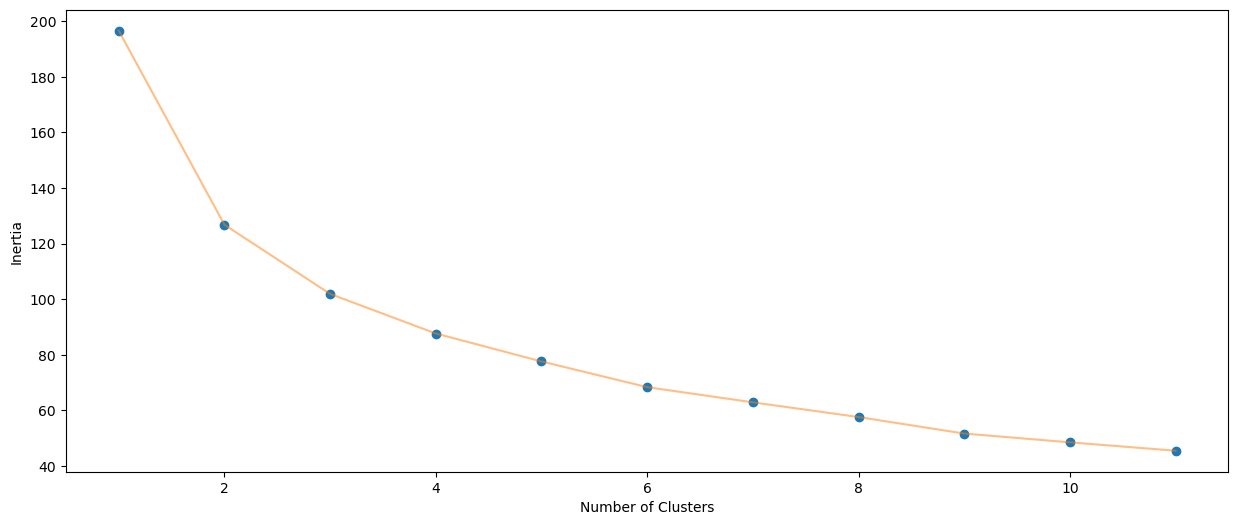

In [793]:
# elbow method 의 꺾이는 지점의 값을 k 값으로 설정
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 ,12) , inertia , 'o')
plt.plot(np.arange(1 , 12) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

## clustering

In [794]:
# 클러스터링하기
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=20)

# 클러스터링 결과값
y_kmeans= kmeans.fit_predict(pca_transformed)

In [795]:
y_kmeans

array([1, 1, 1, 0, 0, 1, 2, 0, 0, 2, 1, 2, 2, 0, 1, 0, 0, 1, 0, 1, 0, 2,
       0, 1, 1, 0, 2, 1, 0, 1, 2, 1, 2, 0, 0, 0, 2, 1, 1, 0, 2, 0, 2, 2,
       1, 1, 1, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0,
       1, 2, 1, 0, 2, 1, 1, 2, 0, 2, 2, 0, 1, 2, 2, 0, 1, 2, 0, 0, 0, 1,
       0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 1, 0, 0, 2, 2,
       2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 1, 0, 2, 0, 2, 1, 0, 2, 2, 2, 1, 0,
       2, 2, 1, 0, 2, 0, 2, 0, 1, 1, 0, 2, 0, 0, 2, 0, 1, 2, 2, 0, 2, 2,
       0, 0, 0, 2, 2, 2, 2, 0, 2, 2, 1, 2, 0, 1, 0, 0, 2, 2, 1, 2, 0, 0,
       0, 2, 2, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 2, 2, 2, 2,
       0, 0, 2, 1, 2, 0, 2, 2, 0, 0, 1, 1, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 2, 1, 2, 2, 0, 2, 0, 1, 0, 1, 0, 0, 0, 2, 1,
       0, 0, 0, 1, 1, 0, 2, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0,
       1, 2, 0, 0, 0, 0, 0])

In [796]:
# 원본데이터에 결과값 붙혀주기
merged_df4['cluster'] = y_kmeans

In [797]:
merged_df4.head(3)

A_count  C_count  P_count  R_count  HARD3_ratio_class  \
USERID                                                          
90107     0.157      0.0    0.141    0.276                0.4   
90190     0.043      0.0    0.000    0.365                0.8   
90388     0.129      0.0    0.174    0.221                1.0   

        HARD6_ratio_class  HARD9_ratio_class  HARD12_ratio_class  \
USERID                                                             
90107                 0.4                0.6                 0.6   
90190                 1.0                1.0                 1.0   
90388                 0.8                0.8                 0.8   

        HARD15_ratio_class  total_ratio  A_ratio_class  C_ratio_class  \
USERID                                                                  
90107                  1.0        0.855            0.4            0.0   
90190                  0.8        0.929            0.6            0.0   
90388                  1.0        0.889            0.4            0.0   

        P_ratio_class  R_ratio_class  cluster  
USERID                                         
90107             0.8            0.6        1  
90190             0.0            1.0        1  
90388             0.4            1.0        1

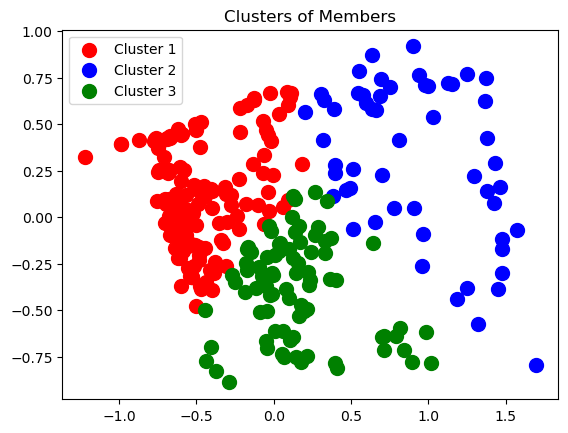

In [798]:
#클러스터링 결과 시각화
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
# plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'black', label = 'Cluster 4')
# plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'yellow', label = 'Cluster 5')
# plt.scatter(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], s = 100, c = 'purple', label = 'Cluster 6')
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Members')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.show()

## Feature Importance(XGB)

In [800]:
# 변수중요도를 위한 분류 모델 (분류 자체의 의미는 없다고 봐도 무방)
from xgboost import XGBClassifier
model = XGBClassifier()

In [801]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(merged_df4.iloc[:,0:len(merged_df4.columns)-1], merged_df4['cluster'], test_size = 0.2, random_state=20)

In [802]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [803]:
y_pred = model.predict(X_test)

In [804]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)

print('정확도: {0:.4f}'.format(accuracy))

정확도: 0.9636


In [805]:
importance = model.feature_importances_
a = pd.DataFrame({'feature': X_train.columns, 'importance': model.feature_importances_})
a

feature  importance
0              A_count    0.021034
1              C_count    0.057646
2              P_count    0.055266
3              R_count    0.066743
4    HARD3_ratio_class    0.031499
5    HARD6_ratio_class    0.046499
6    HARD9_ratio_class    0.077687
7   HARD12_ratio_class    0.120779
8   HARD15_ratio_class    0.042856
9          total_ratio    0.242925
10       A_ratio_class    0.026925
11       C_ratio_class    0.138464
12       P_ratio_class    0.032756
13       R_ratio_class    0.038922

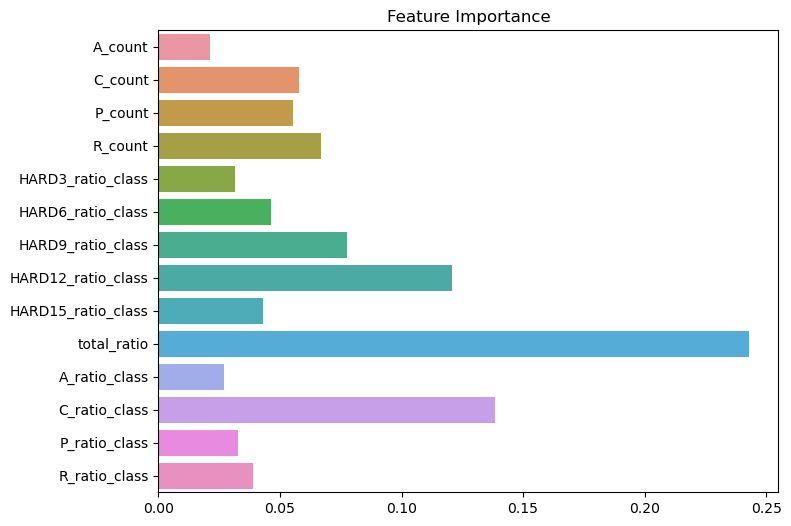

In [806]:
ftr_importance = pd.Series(importance, index=X_train.columns)

plt.figure(figsize=(8,6))
plt.title('Feature Importance')
sns.barplot(x=ftr_importance, y=ftr_importance.index)
plt.show()

In [807]:
merged_df4.columns

Index(['A_count', 'C_count', 'P_count', 'R_count', 'HARD3_ratio_class',
       'HARD6_ratio_class', 'HARD9_ratio_class', 'HARD12_ratio_class',
       'HARD15_ratio_class', 'total_ratio', 'A_ratio_class', 'C_ratio_class',
       'P_ratio_class', 'R_ratio_class', 'cluster'],
      dtype='object')

In [813]:
df_1 = merged_df4[['A_count', 'C_count', 'P_count', 'R_count',
                  'HARD3_ratio_class', 'HARD6_ratio_class', 'HARD9_ratio_class',
       'HARD12_ratio_class', 'HARD15_ratio_class', 'total_ratio', 'cluster']]

df_2 = merged_df4[['R_count', 'A_ratio_class', 'C_ratio_class', 'P_ratio_class', 'R_ratio_class',
       'cluster']]

df_3 = merged_df4[['A_count', 'C_count', 'P_count', 'R_count','total_ratio','R_ratio_class', 'cluster']]

df_4 = merged_df4[['A_count', 'C_count', 'P_count', 'R_count', 'total_ratio', 'A_ratio_class', 'C_ratio_class',
       'P_ratio_class', 'R_ratio_class', 'cluster']]

## 결과 시각화

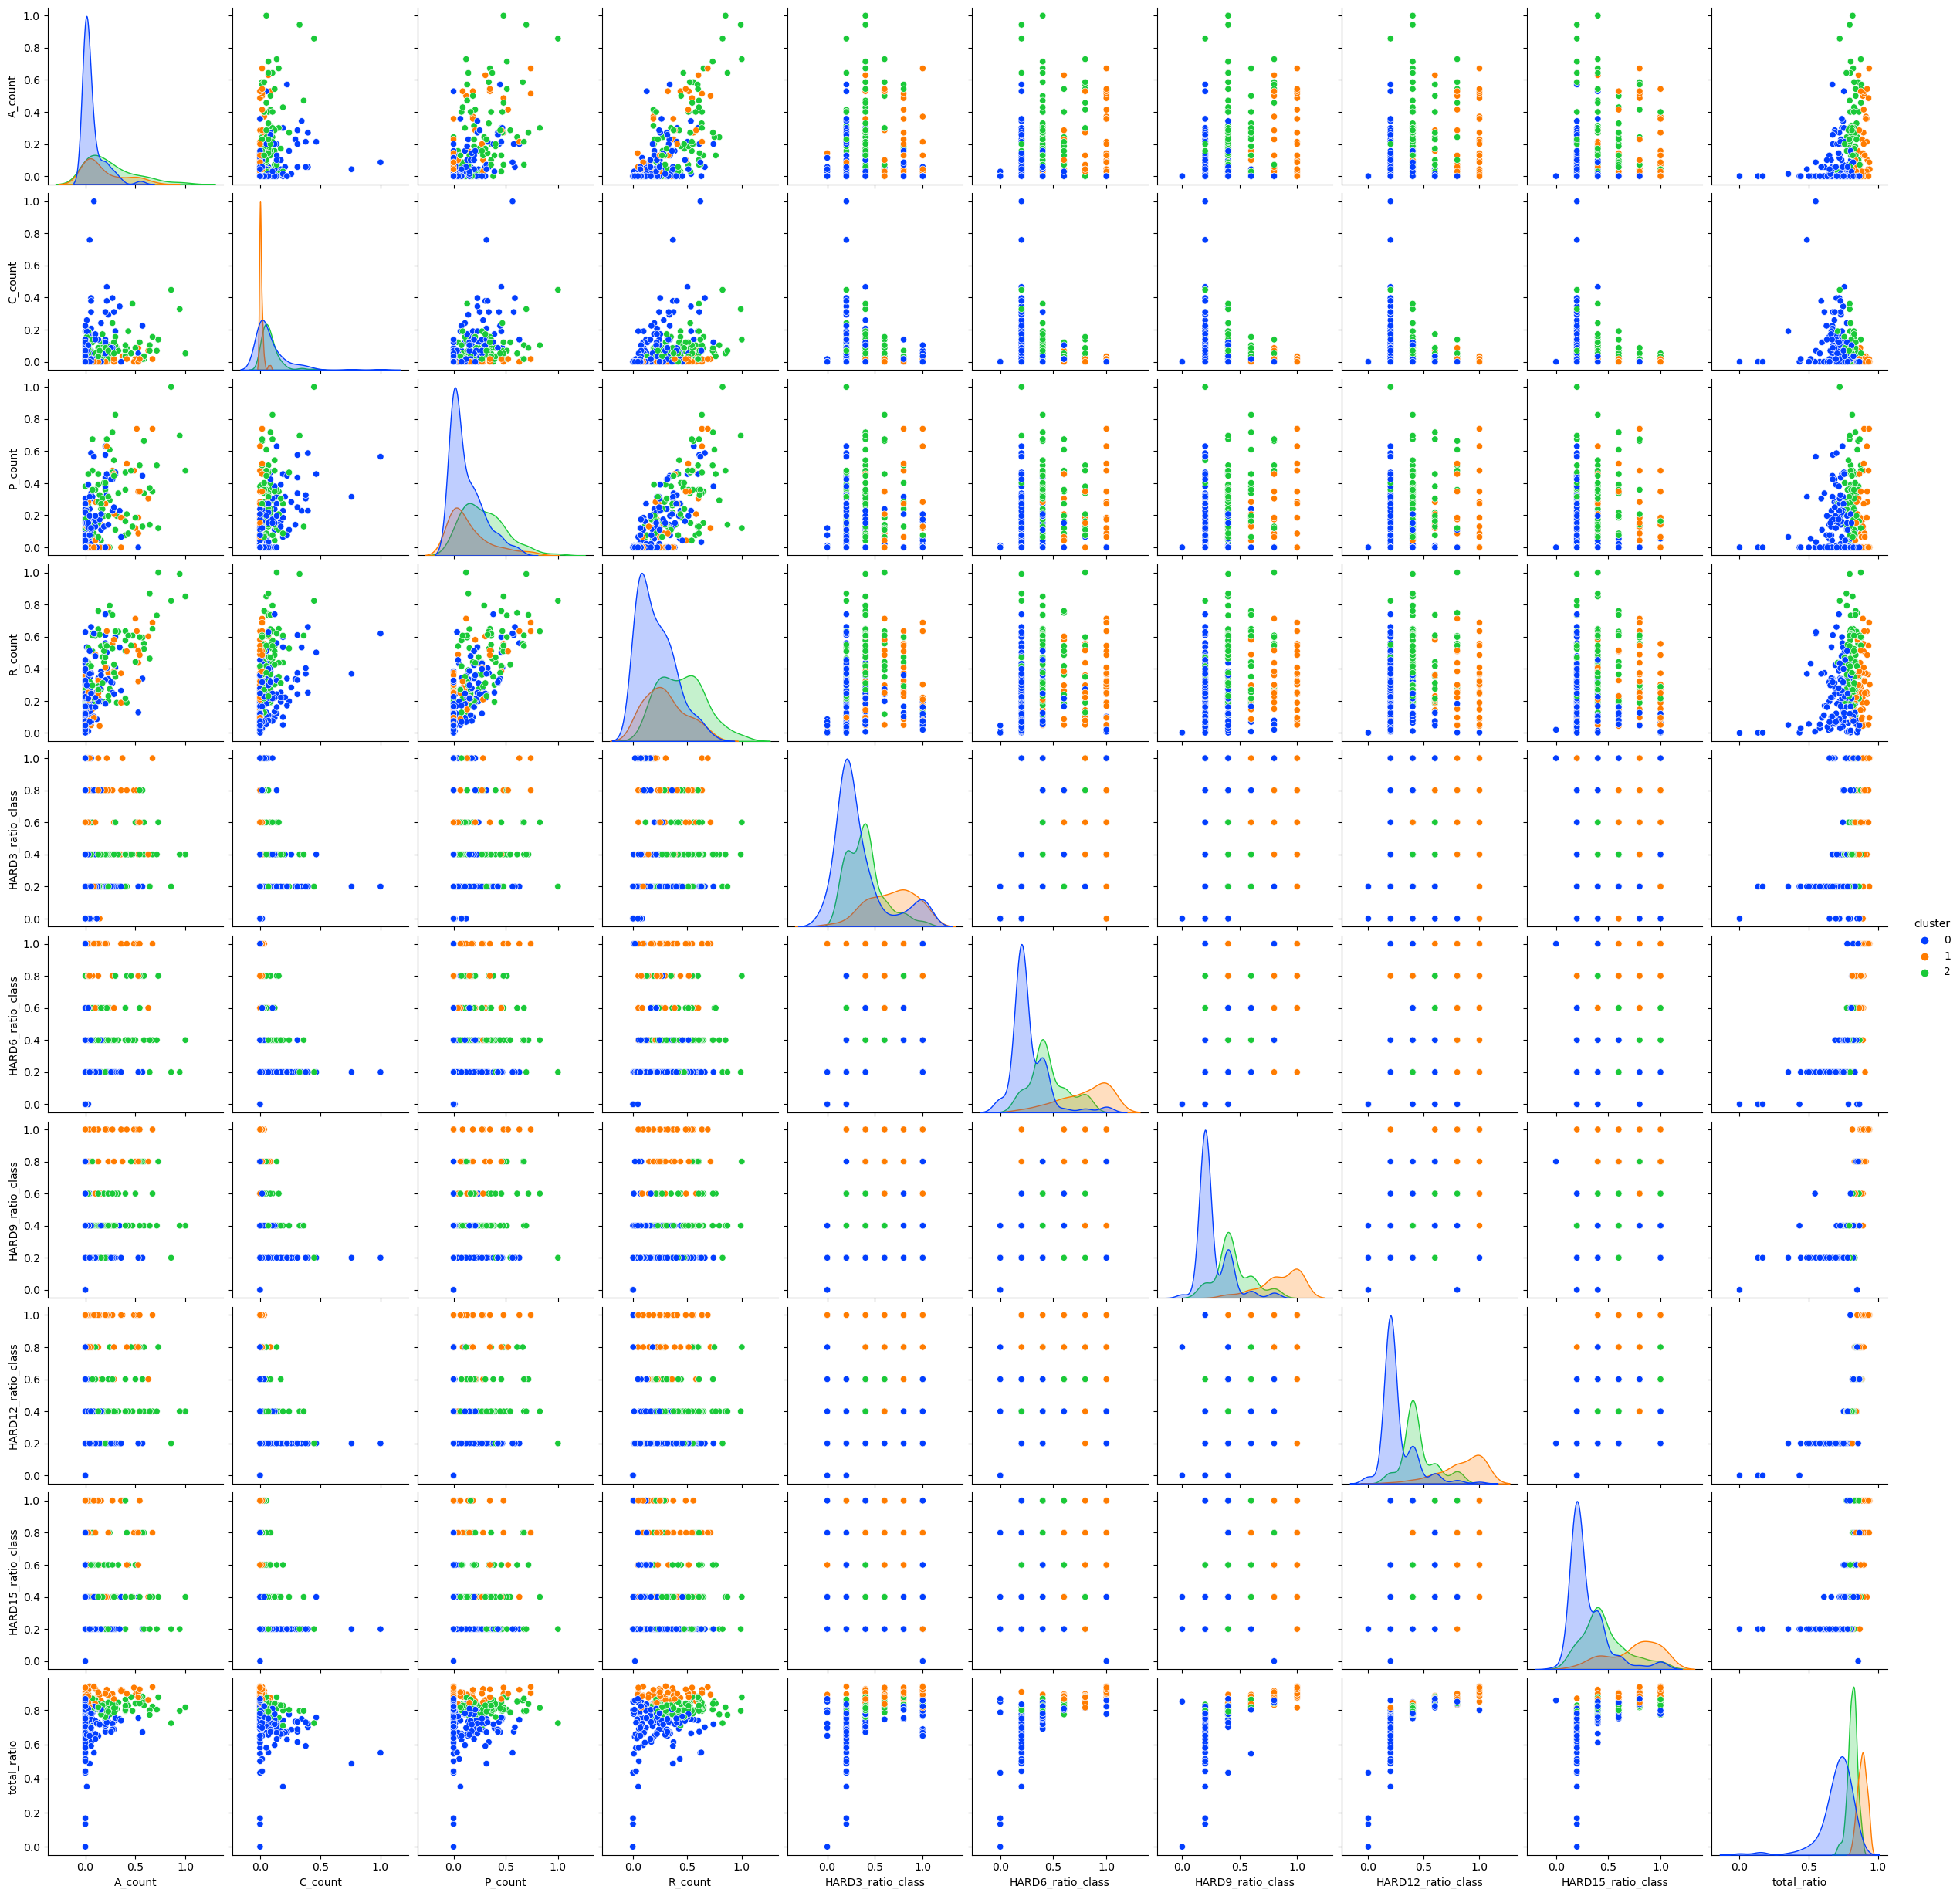

In [809]:
sns.pairplot(df_1, hue ='cluster', palette='bright')

plt.show()

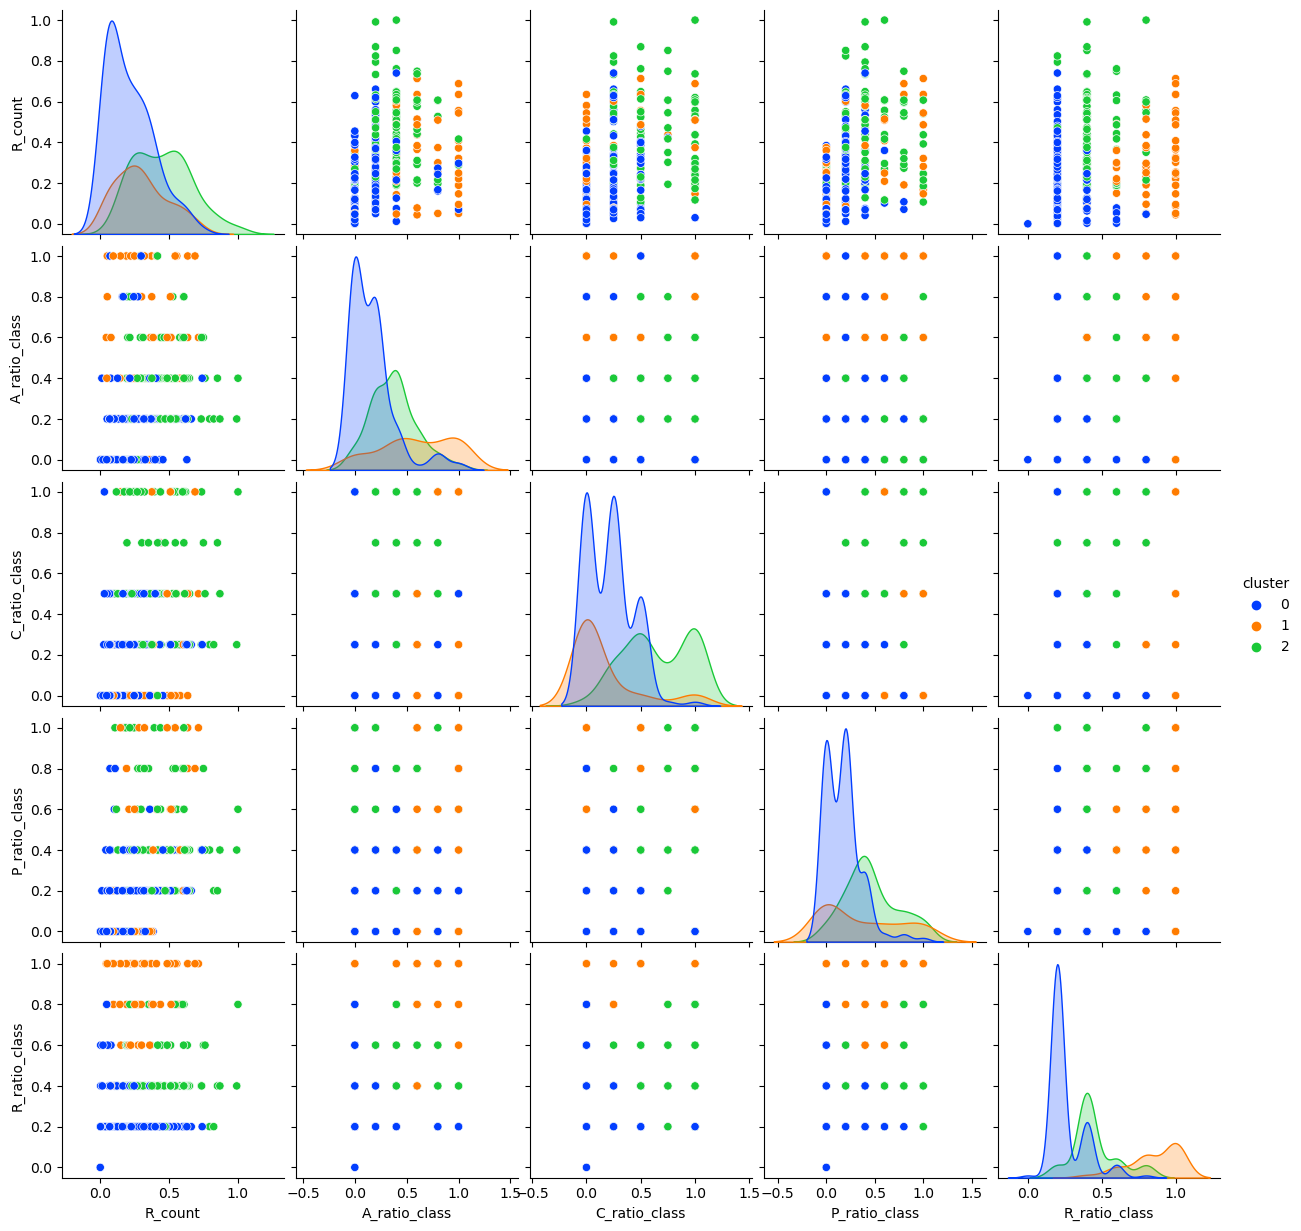

In [810]:
sns.pairplot(df_2, hue ='cluster', palette='bright')

plt.show()

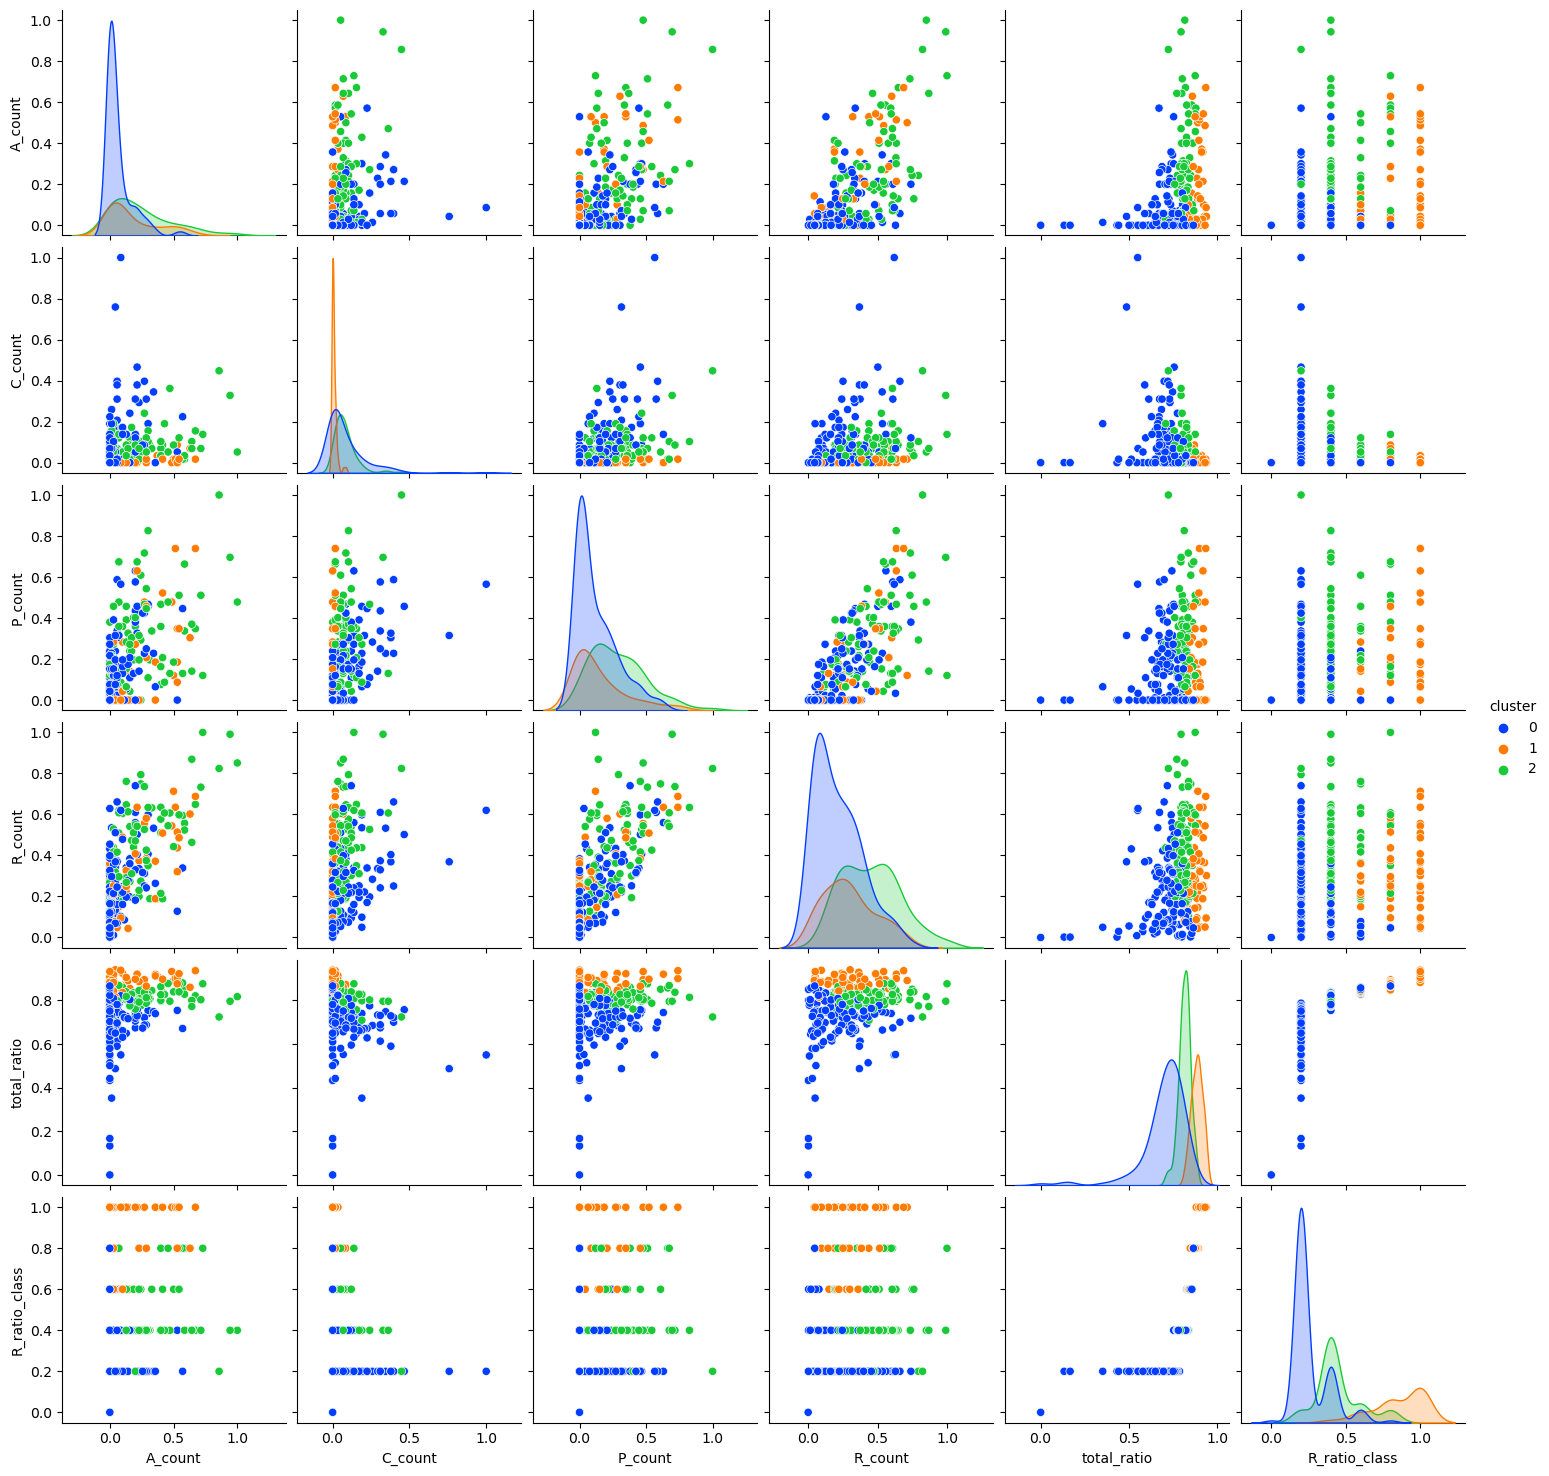

In [811]:
sns.pairplot(df_3, hue ='cluster', palette='bright')

plt.show()

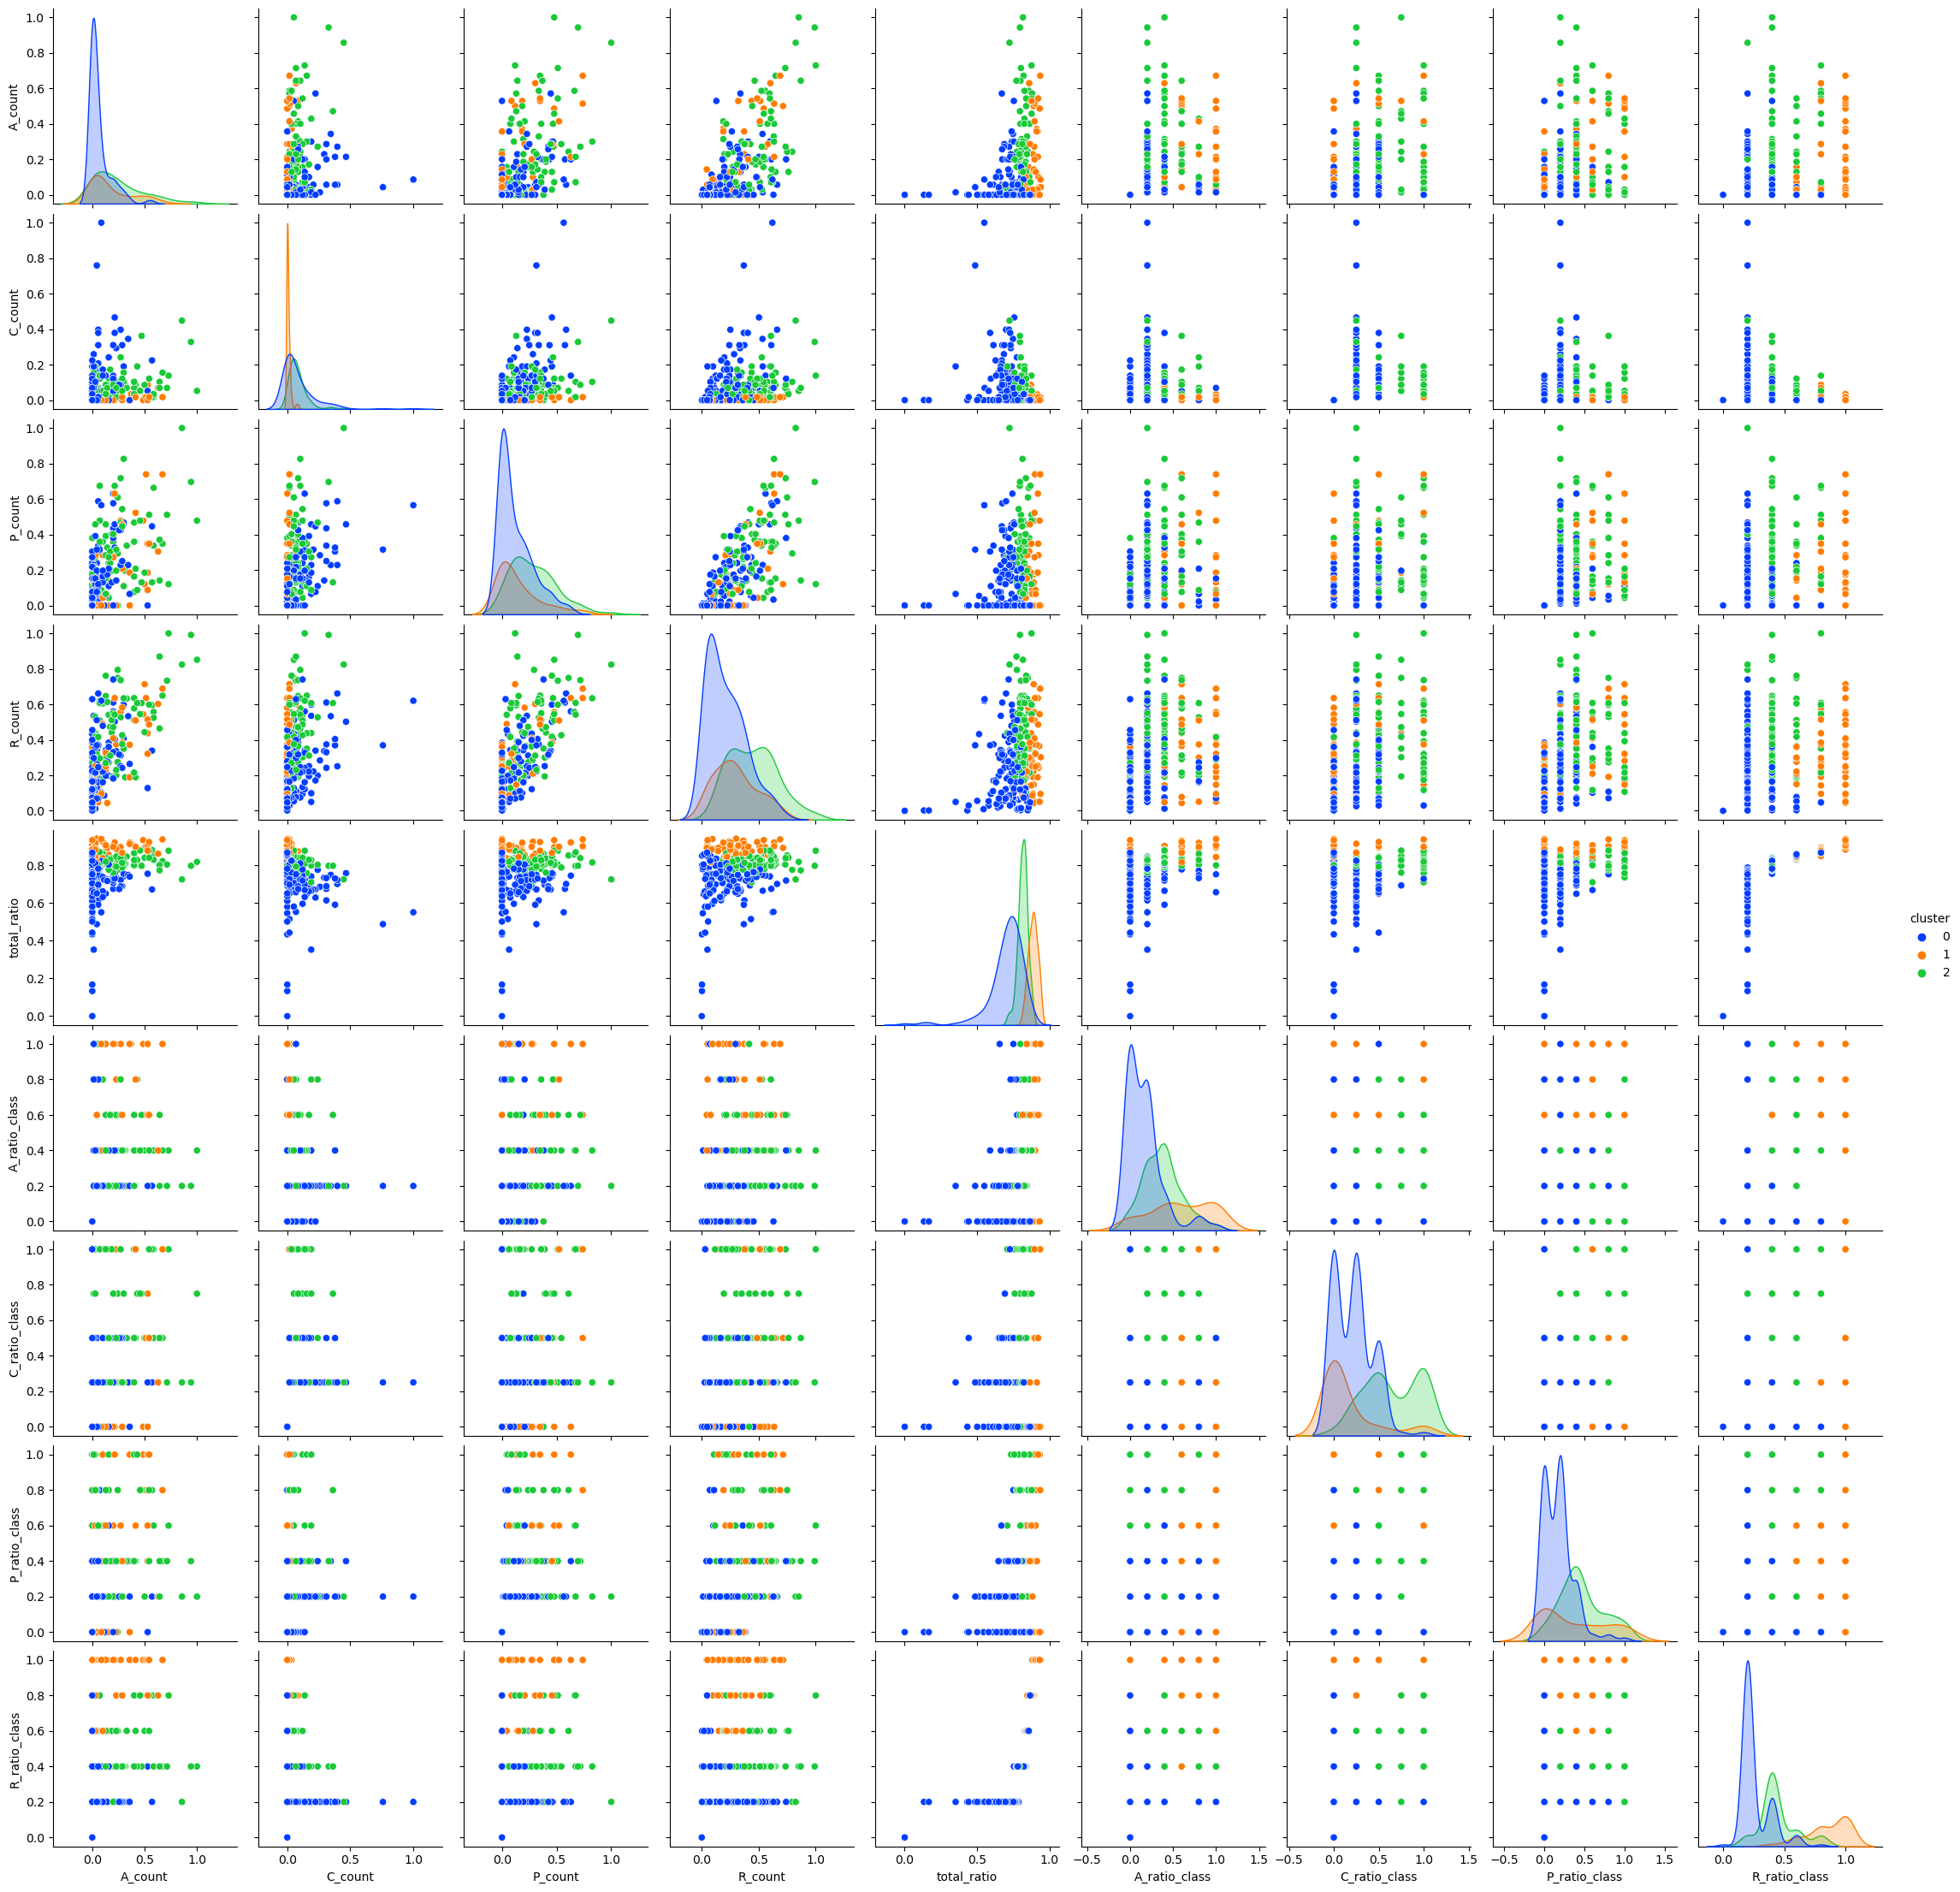

In [814]:
sns.pairplot(df_4, hue ='cluster', palette='bright')

plt.show()